In [1]:
from scipy.io import arff
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

First, we read the file and make some changes to the data, basically we remove spaces to homogenize the data and make it easier to work with.

Then, we can read the dataset and start working with it. For instance, we can start by looking at the first 5 rows of the dataset, to see what we are dealing with.

In [2]:
filename_csv = '../data/adult.data'

# Remove spaces from the file
with open(filename_csv, 'r') as f:
    lines = f.readlines()
    lines = [line.replace(' ', '') for line in lines]

with open(filename_csv, 'w') as f:
    f.writelines(lines)

# We read the csv file, ? are missing values
df = pd.read_csv(filename_csv, header=None, na_values='?',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

# We can see the first 5 rows
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0             

Now, we can perform some basic statistics.
For example, what is the distribution of the class attribute?

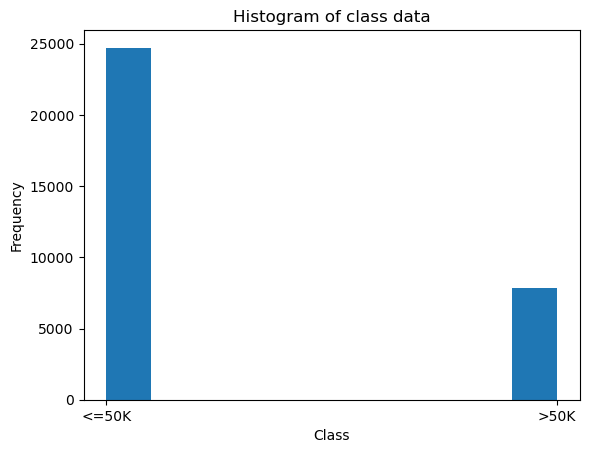

In [3]:
class_data = df['class']

# We can plot a histogram of the class data
plt.hist(class_data)
plt.title('Histogram of class data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

As we can see, it is about 25/75, which is not bad.
We can also see the distribution of different attributes, like the sex, the age and the race:

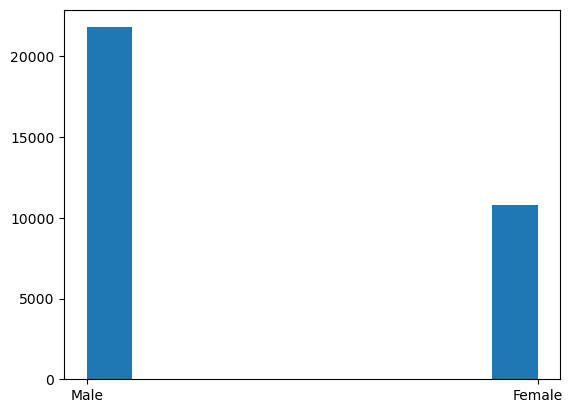

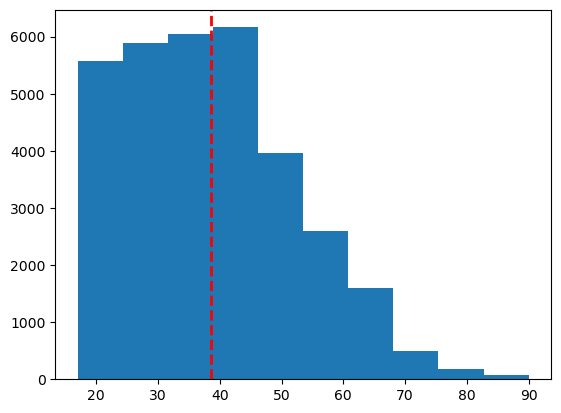

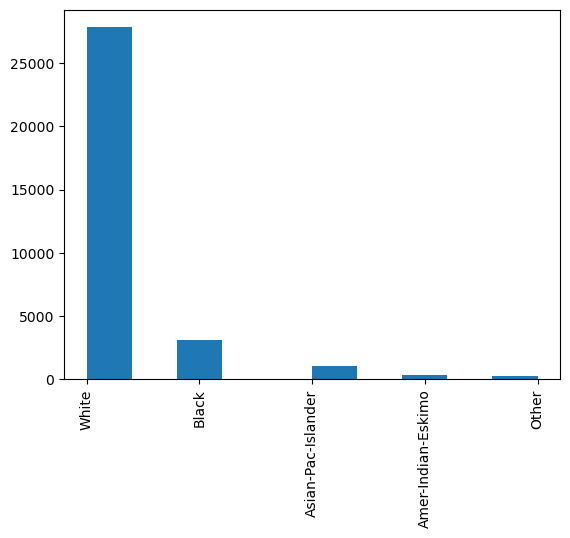

In [4]:
sex = df['sex']
age = df['age']
race = df['race']

# And plot it
plt.hist(sex)
plt.show()

plt.hist(age)
# we plot the average age
plt.axvline(np.mean(age), color='r', linestyle='dashed', linewidth=2)
plt.show()

plt.hist(race)
# rotate the x axis labels
plt.xticks(rotation=90)
plt.show()

We can see how the dataset is mainly composed of white-males between 20 and 40 years old. Thus, we can see that the dataset is not balanced, and we will have to take this into account when we train our models. This will be an added challenge to the project.

For instance, an initial assessment that we can do is to see how the income is distributed:

Percentage of white people with salary > 50K:  0.2558599367270636
Percentage of black people with salary > 50K:  0.12387964148527529


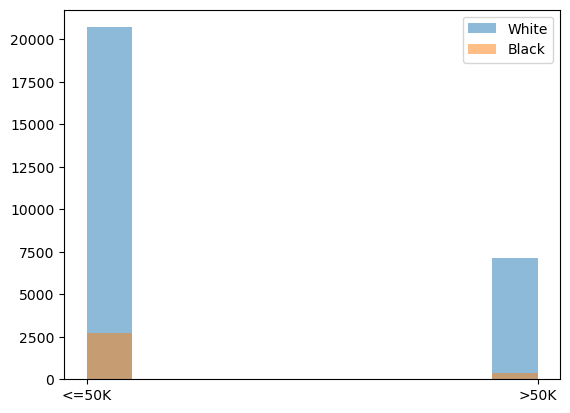

In [5]:
# Let's see how is the salary distribution in white people and black people
white = df[df['race'] == 'White']['class']
black = df[df['race'] == 'Black']['class']

# We can compute the percentage of people with salary > 50K
print('Percentage of white people with salary > 50K: ', np.sum(white == '>50K') / len(white))
print('Percentage of black people with salary > 50K: ', np.sum(black == '>50K') / len(black))

# Let's plot both histograms together
plt.hist(white, alpha=0.5, label='White')
plt.hist(black, alpha=0.5, label='Black')
plt.legend(loc='upper right')
plt.show()

Percentage of male people with salary > 50K:  0.3057365764111978
Percentage of female people with salary > 50K:  0.10946058861758426


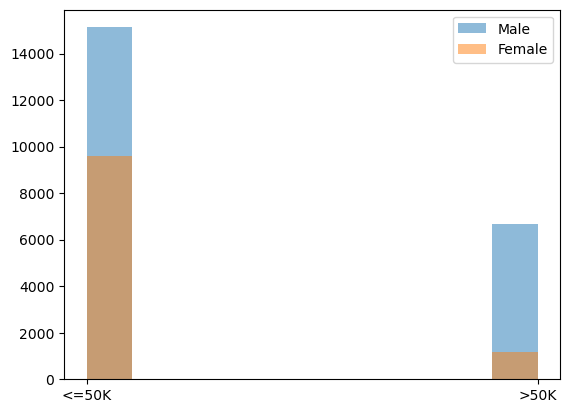

In [6]:
# Let's see how is the salary distribution between sex
male = df[df['sex'] == 'Male']['class']
female = df[df['sex'] == 'Female']['class']

# We can compute the percentage of people with salary > 50K
print('Percentage of male people with salary > 50K: ', np.sum(male == '>50K') / len(male))
print('Percentage of female people with salary > 50K: ', np.sum(female == '>50K') / len(female))

# Let's plot both histograms together
plt.hist(male, alpha=0.5, label='Male')
plt.hist(female, alpha=0.5, label='Female')
plt.legend(loc='upper right')
plt.show()

This way, we see how there are significant differences between the distribution of the class attribute in each group. This will ultimately affect our models, and we will try to take measures to reduce the bias, assessing the impact of the measures in the results.

As final pre-assessment, let's see how many missing values we have in the dataset:

In [7]:
# How many missing values are there?
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


# Preprocessing

We are going to perform some preprocessing to the dataset, in order to make it more suitable for our models. We will perform the following steps:

1. Inspection of the dataset
2. Data cleaning
3. See equivalence between attributes
4. Explorative analysis
5. Outliers
6. Variable importance assessment

## 1. Inspection of the dataset

We have already performed this step in our first assessment, but it is nice to have it all packed together.

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

## 2. Data cleaning

We can see how workclass and occupation have missing values. We will have to deal with them. Firstly, let's see if they are missing in the same rows (which seems reasonable because the amount of missing values is almost the same): 

In [11]:
filter = df['occupation'].isnull() & df['workclass'].isnull()

df.loc[filter].count()

age               1836
workclass            0
fnlwgt            1836
education         1836
education-num     1836
marital-status    1836
occupation           0
relationship      1836
race              1836
sex               1836
capital-gain      1836
capital-loss      1836
hours-per-week    1836
native-country    1809
class             1836
dtype: int64

This means that all instances without workclass also have missing occupation. We will have to deal with this. We have to further inspect these columns, because maybe they are telling us the same information.

In [12]:
# 1. We get all possible pairs of values for the occupation and workclass
# 2. We group by occupation and workclass
# 3. We see if the mapping is unique
print(df.groupby(['occupation', 'workclass']).size().reset_index().rename(columns={0:'count'}))
print(df.groupby(['workclass','occupation']).size().reset_index().rename(columns={0:'count'}))

          occupation         workclass  count
0       Adm-clerical       Federal-gov    317
1       Adm-clerical         Local-gov    283
2       Adm-clerical           Private   2833
3       Adm-clerical      Self-emp-inc     31
4       Adm-clerical  Self-emp-not-inc     50
..               ...               ...    ...
76  Transport-moving           Private   1266
77  Transport-moving      Self-emp-inc     27
78  Transport-moving  Self-emp-not-inc    122
79  Transport-moving         State-gov     41
80  Transport-moving       Without-pay      1

[81 rows x 3 columns]
      workclass         occupation  count
0   Federal-gov       Adm-clerical    317
1   Federal-gov       Armed-Forces      9
2   Federal-gov       Craft-repair     64
3   Federal-gov    Exec-managerial    180
4   Federal-gov    Farming-fishing      8
..          ...                ...    ...
76  Without-pay    Farming-fishing      6
77  Without-pay  Handlers-cleaners      1
78  Without-pay  Machine-op-inspct      1
79  W

We can see that the mapping is not unique, so both attributes are informative. We will have to deal with the missing values somehow. For now, let's just drop this rows (only 5%). 

In fact, we tried to impute the missing values, but it is not really possible, because the variables are very independent.

In [13]:
#drop the rows with workclass or occupation missing
df = df.dropna(subset=['occupation', 'workclass'])
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
class               0
dtype: int64

We still have plenty of null values in the native-country column. For now, we will just drop this column, because we don't have enough information to fill the missing values. The situation is similar to the previous ones. The rest of the columns are not informative enough to predict the native country.

In [14]:
df = df.dropna(subset=['native-country'])
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Now, we can see that the dataset is clean, and we can start to preprocess it.

## 3. See equivalence between attributes

### Are the columns 'education' and 'education-num' redundant?

In [15]:
print(df.groupby(['education', 'education-num']).size().reset_index().rename(columns={0:'count'}))

       education  education-num  count
0           10th              6    820
1           11th              7   1048
2           12th              8    377
3        1st-4th              2    151
4        5th-6th              3    288
5        7th-8th              4    557
6            9th              5    455
7     Assoc-acdm             12   1008
8      Assoc-voc             11   1307
9      Bachelors             13   5044
10     Doctorate             16    375
11       HS-grad              9   9840
12       Masters             14   1627
13     Preschool              1     45
14   Prof-school             15    542
15  Some-college             10   6678


Indeed, the column 'education-num' is a numerical representation of the column 'education'. As we can see, the numerical representation introduces a notion of order in the categories. We have seen in class that this can be problematic, but in this case, the order could be meaningful. For example, a person with a master degree is more likely to have a higher income than a person with a high school degree. 

Therefore, we will keep both columns, and we will try to see if the numerical representation is useful for our models, or if we should just use the categorical representation or a one-hot encoding.

## 4. Explorative analysis

We are going to start by plotting the distribution of the income for each category of the categorical attributes. We will start with the age:

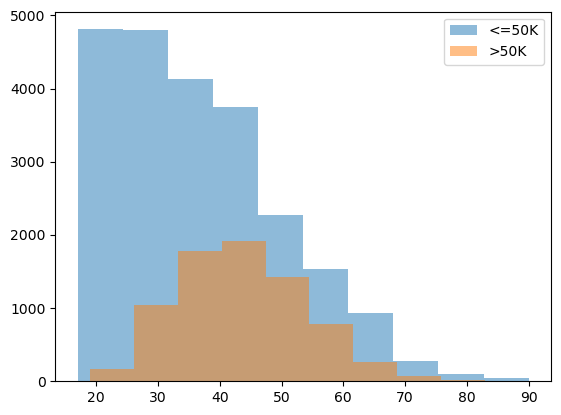

In [16]:
plt.hist(df[df['class'] == '<=50K']['age'], alpha=0.5, label='<=50K')
plt.hist(df[df['class'] == '>50K']['age'], alpha=0.5, label='>50K')
plt.legend(loc='upper right')
plt.show()

Observations:
- There are less people with income >50K, but this distribution follows a somewhat normal distribution centered in the 40s.
- The <=50K distribution is more skewed to the left, and it is more concentrated in the 20s and 30s.

Let's now see what happens with the education:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']


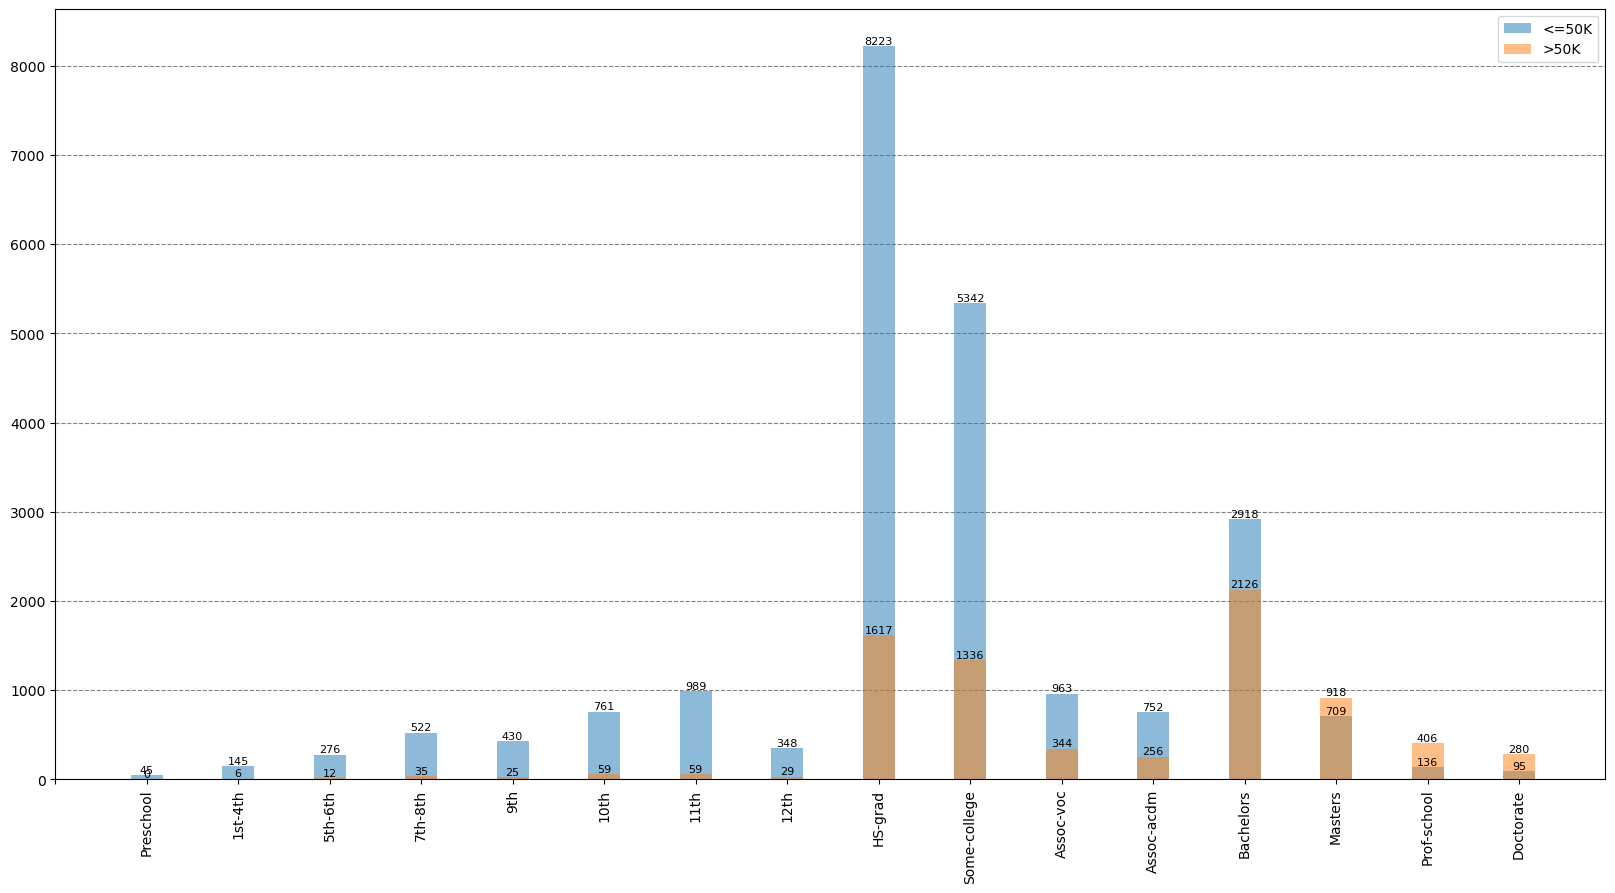

In [17]:
#plot the class against the education, for each education we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['education-num'].unique()
#sort the labels
labels.sort()
#get the correspondent education to each education-num
labels2 = [df[df['education-num'] == label]['education'].iloc[0] for label in labels]
print(labels)
print(labels2)
bin_edges = np.arange(len(labels)+1) + 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['education-num'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['education-num'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels2)+1), ['']+labels2, rotation='vertical')
#separate the bars
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()

We observe that most people has the high school diploma and has attended some college. Also, we see that all classes have a higher percentage of people earning below 50K, with the only exceptions of people with a Master's degree and higher. This is a good indicator that this attribute is important for our prediction, which also aligns with our intuition.

Let's see now what happens with marital status:

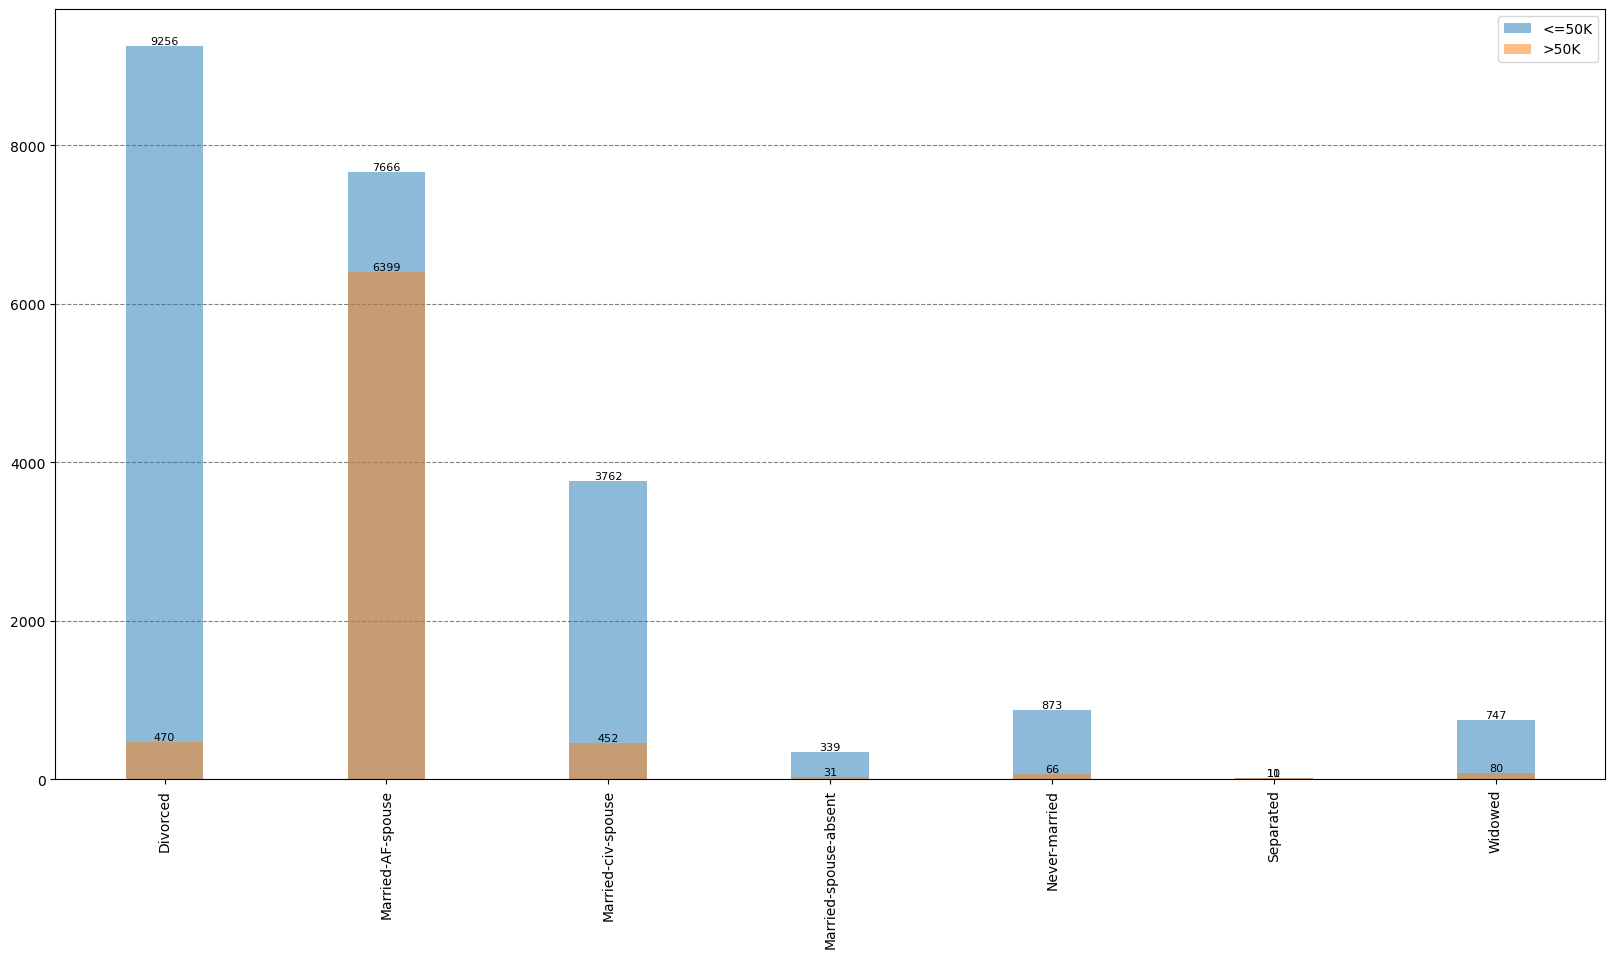

In [18]:
#plot the class against the marital-status, for each marital-status we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['marital-status'].unique()
#sort the labels
labels.sort()
bin_edges = np.arange(len(labels)+1) - 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['marital-status'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['marital-status'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels)), labels, rotation='vertical')
#separate the bars
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()


All classes are quite skewed towards <=50K, except for the Married-af-spouse class. This is interesting, because it means that people who are married are more likely to have a higher income. This is probably because married people are more likely to have a stable job, and thus, a higher income. This will make our models tend to predict a lower income for people that are not married. 

Of course, the occupation is also important:

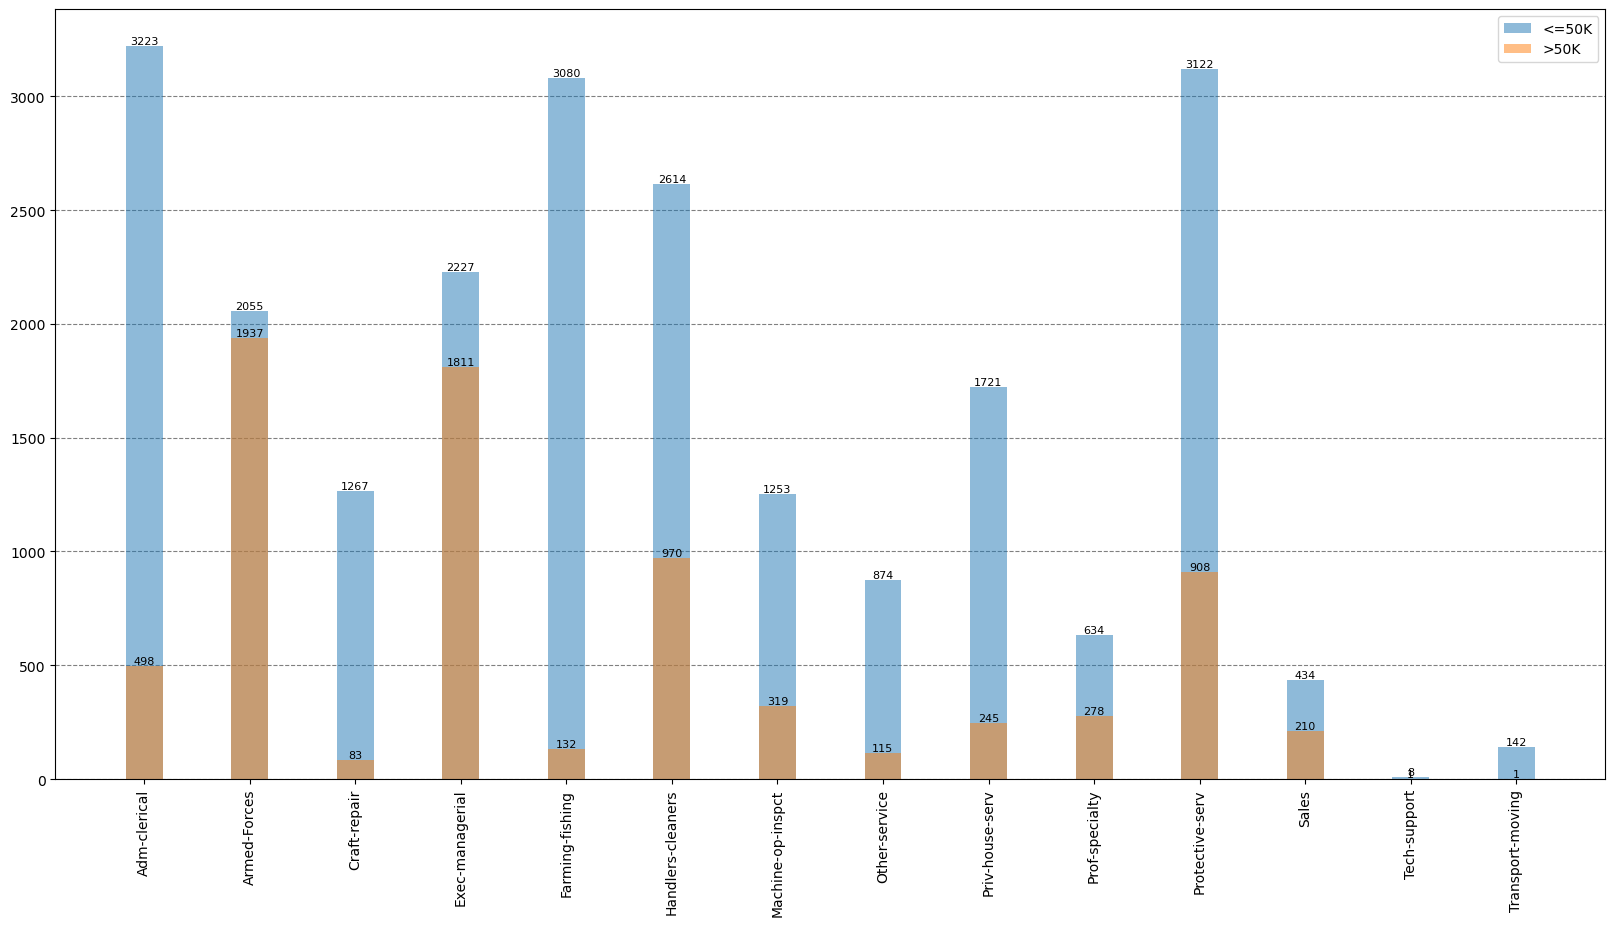

In [19]:
#plot the class against the occupation, for each occupation we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['occupation'].unique()
#sort the labels
labels.sort()
bin_edges = np.arange(len(labels)+1) - 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['occupation'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['occupation'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels)), labels, rotation='vertical')
#separate the bars 
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()

We see that in all jobs there are more people earning below 50K, but there are still differences in the distributions. For instance, people in the Armed-Forces are difficult to predict, because the distribution is very even. On the other side, a farmer/fisher is most likely earning below 50K.

Now, we can assess if the numerical variables that we have are related between them. For this, we are going to plot a correlation matrix:

/tmp/ipykernel_7105/546123972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(['education-num'], axis=1).corr()


<AxesSubplot:>

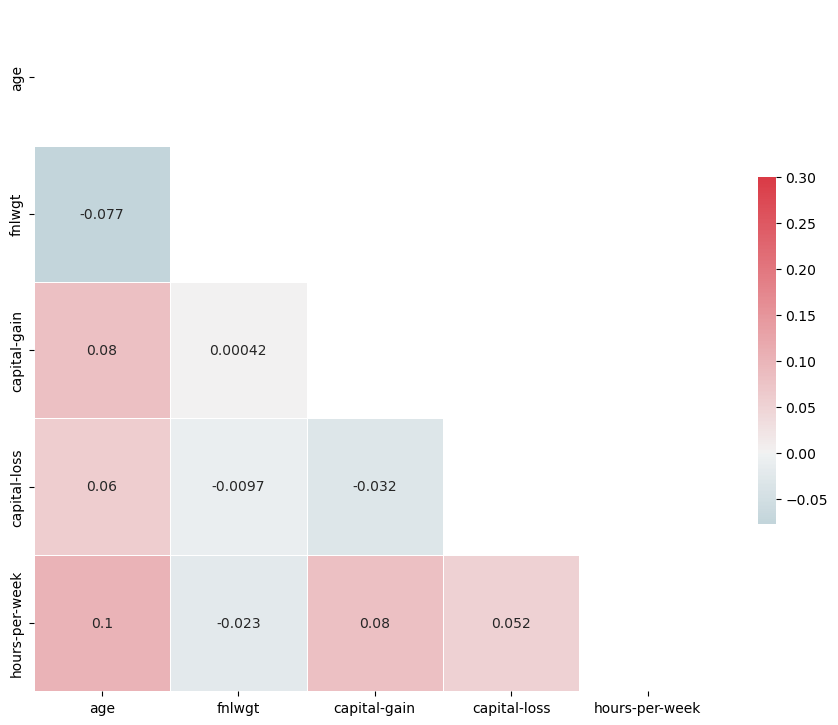

In [20]:
# Correlation matrix of the numerical features, except education-num
corr = df.drop(['education-num'], axis=1).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw also the values of the correlation
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

We observe that the maximum correlation is 0.08, which is very low. This means that numerical variables are not highly correlated, and we can keep them all, because they are all informative by themselves.

On the other hand, the variable fnlwgt is not correlated with any other variable, and it is in fact a weight assigned for sampling, so it is not related with the income. Therefore, we can drop this column.

In [21]:
df = df.drop(['fnlwgt'], axis=1)

Let's now see how these numerical variables are distributed:

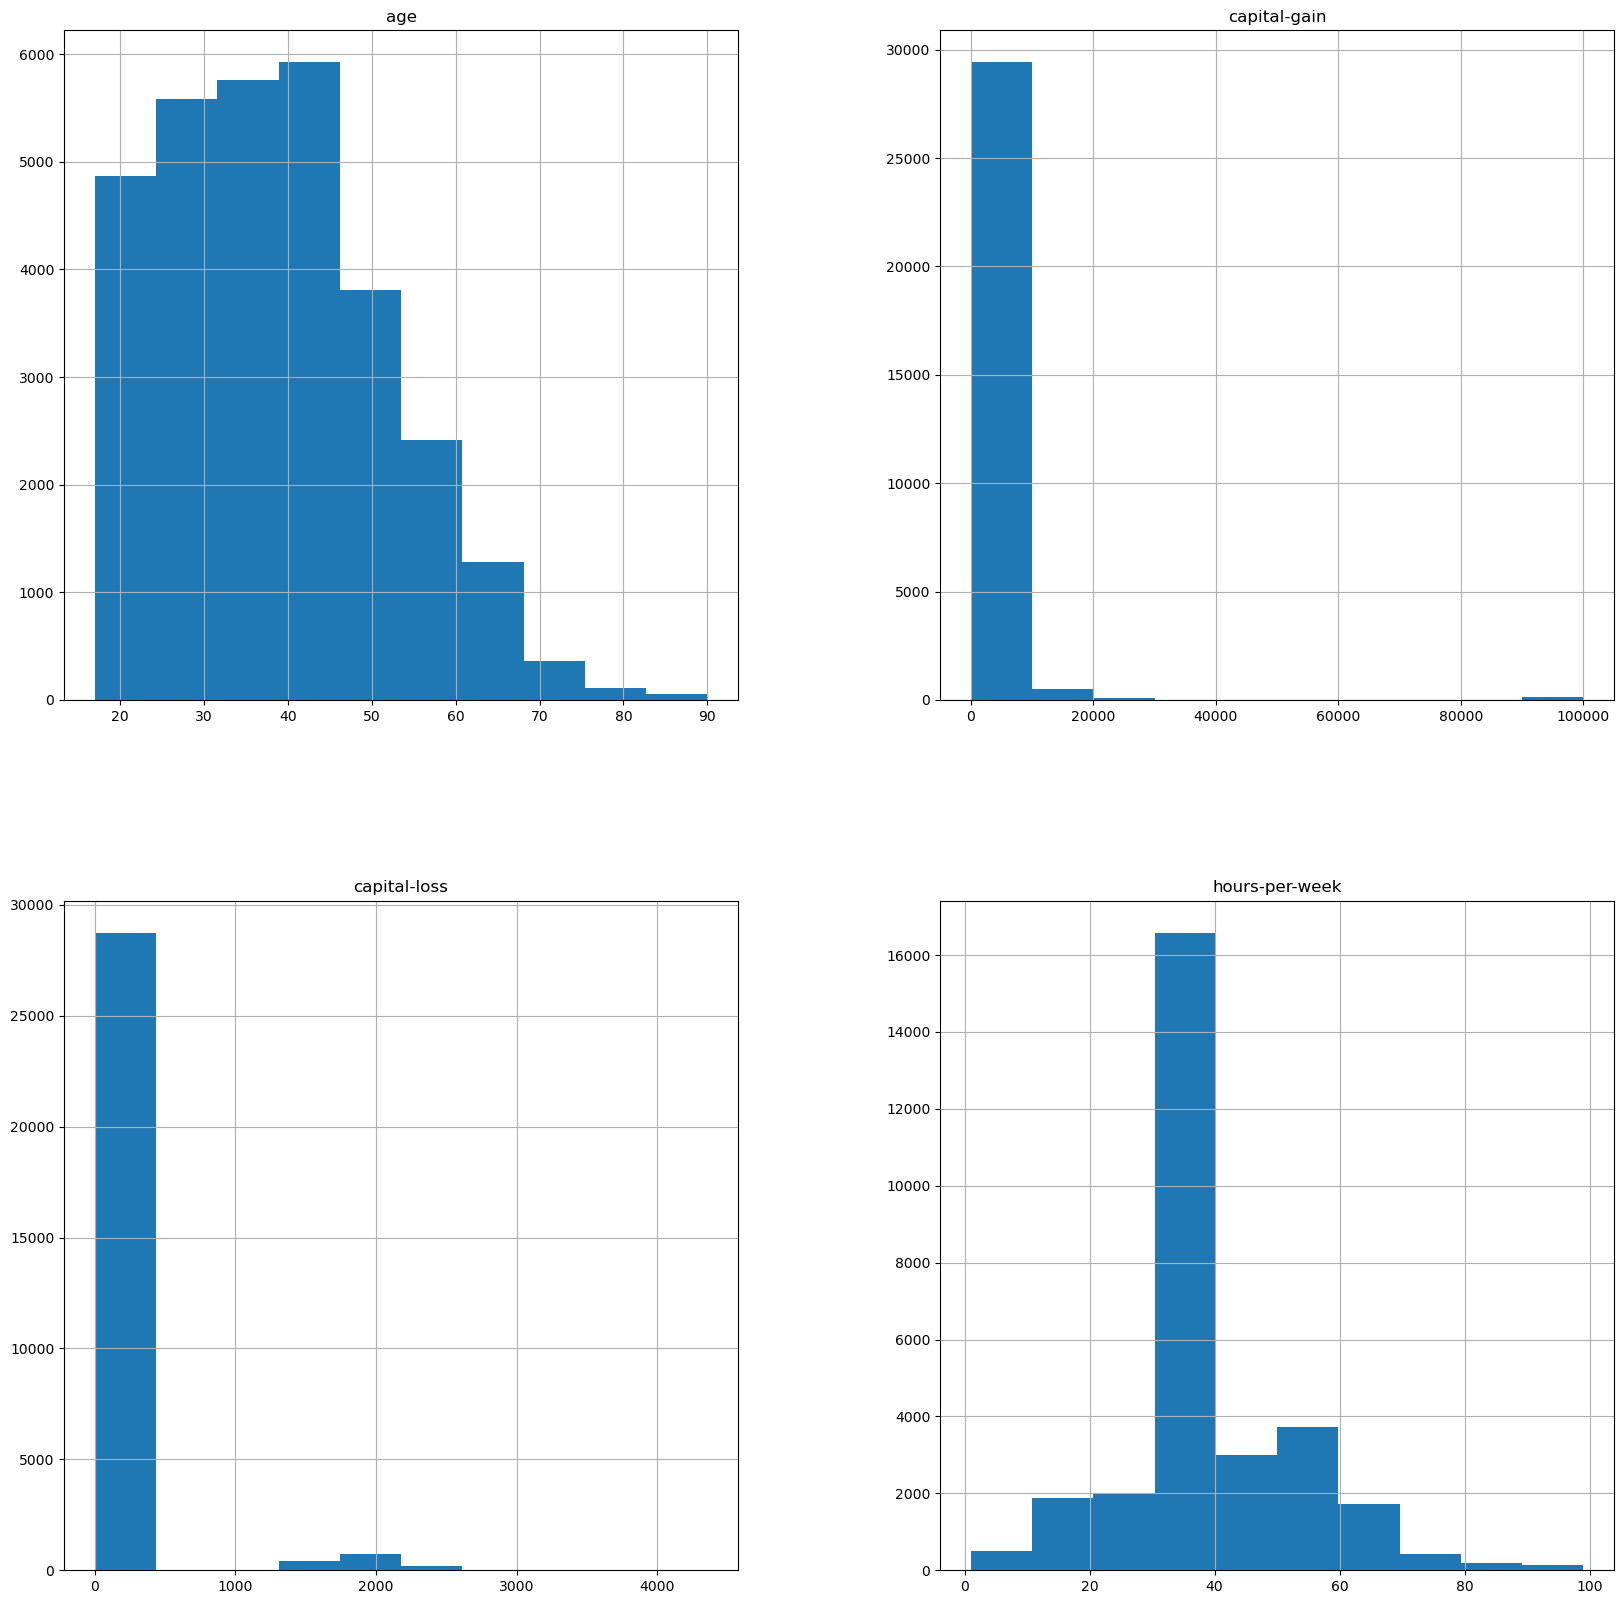

In [22]:
# Plot the distribution of the numerical features, except education-num
df.drop(['education-num'], axis=1).hist(figsize=(20,20))
plt.show()

Capital-gain and capital-loss are highly skewed, we have to take a deeper look at them.

Age looks pretty normal, with more younger people than older people.

Hours-per-week looks mostly normal, except for some extreme values that we will take care of later.

       capital-gain  capital-loss
count  30162.000000  30162.000000
mean    1092.007858     88.372489
std     7406.346497    404.298370
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000


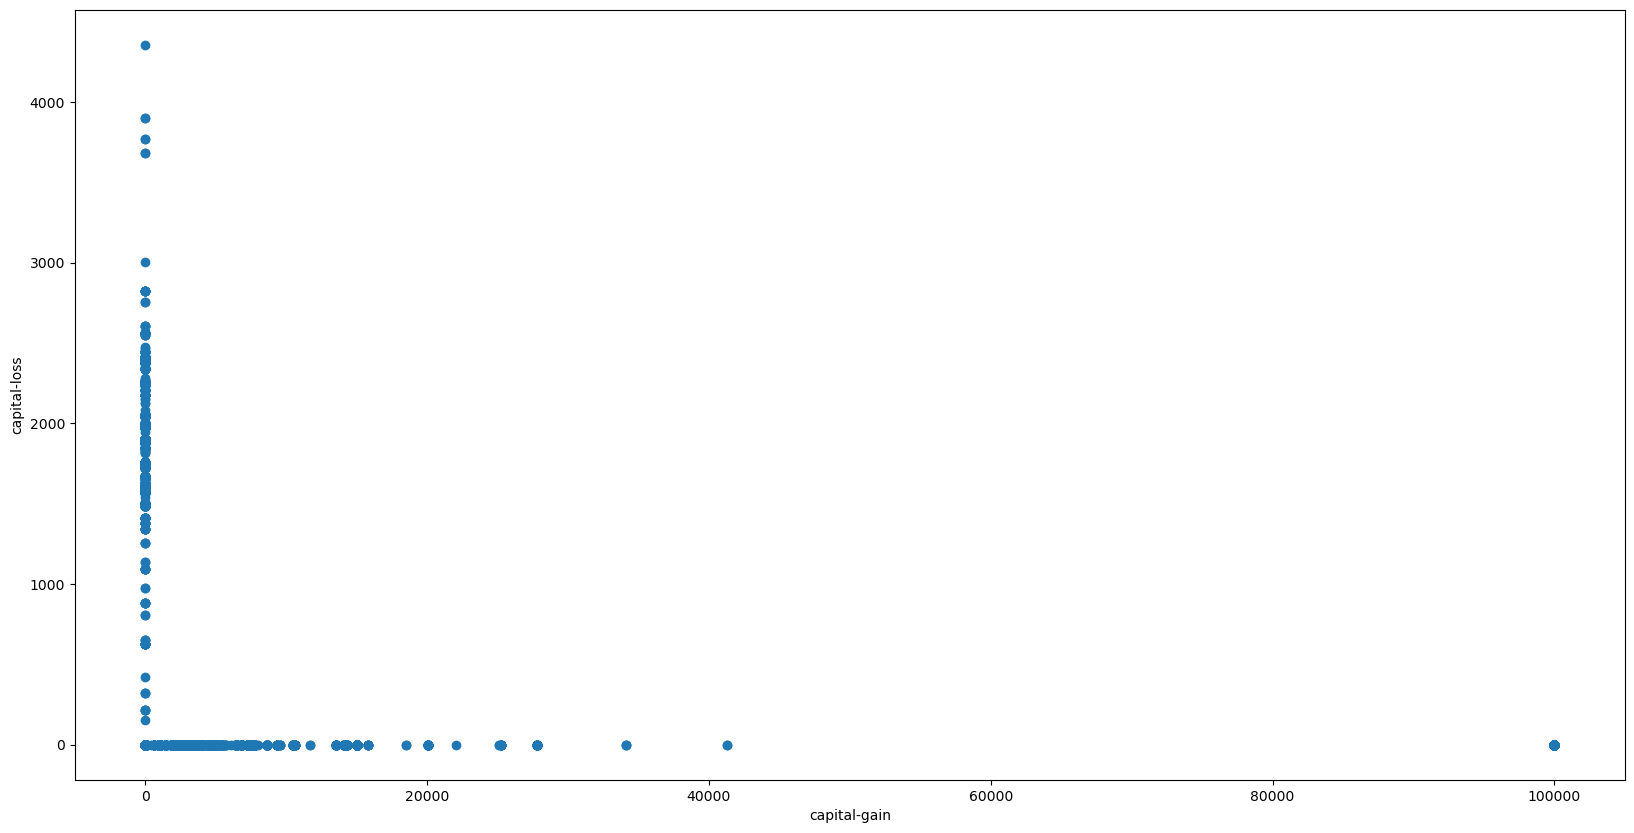

In [23]:
# Statistical description of capital-gain and capital-loss
print(df[['capital-gain', 'capital-loss']].describe())

# Let's plot the capital-gain and capital-loss one against the other
plt.figure(figsize=(20,10))
plt.scatter(df['capital-gain'], df['capital-loss'])
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

This is very interesting: whenever capital-gain is greater than 0, then capital-loss is 0, and the opposite is also true.

One approach to this is to create a new variable that is the difference between capital-gain and capital-loss. This way, we will have a single variable that represents the net capital gain/loss. We will try this approach, and we will see if it improves the results. 

Pros:
- Simplification: Combining the two variables into one can simplify the data analysis process and make it easier to understand the relationship between the two variables.
- Fewer variables: Having fewer variables can be beneficial when working with large datasets or when trying to avoid overfitting in a model.

Cons:
- Loss of information: By combining the two variables, you lose information about the magnitude and direction of the individual variables. This can make it more difficult to understand the relationship between the variables.
- Skewed data: If the individual variables have different ranges or distributions, combining them into a single variable can skew the data and make it more difficult to analyze.

In [24]:
# We create the new feature capital-diff
df['capital-diff'] = df['capital-gain'] - df['capital-loss']

# If we were right, the absolute value of capital-diff should be equal to the sum of capital-gain and capital-loss
(df['capital-diff'].abs() == df['capital-gain'] + df['capital-loss']).all()

True

In [25]:
df['capital-diff'].describe(percentiles=[0.01,0.05,0.1,0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    30162.000000
mean      1003.635369
std       7430.372730
min      -4356.000000
1%       -1980.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%       5013.000000
99%      15024.000000
max      99999.000000
Name: capital-diff, dtype: float64

As we can see, most values are 0, and the maximum is 99999, which looks like a mistaken value. We just remove this one.

In [26]:
# Remove the maximum value of capital-diff
df = df[df['capital-diff'] != df['capital-diff'].max()]

df['capital-diff'].describe(percentiles=[0.01,0.05,0.1,0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    30014.000000
mean       515.486040
std       2630.259258
min      -4356.000000
1%       -1980.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%       4650.000000
99%      15024.000000
max      41310.000000
Name: capital-diff, dtype: float64

We can see how this variable is actually non zero in very few instances, maybe it would be better to transform it into a categorical variable, with 3 categories: positive, negative and zero.

This way, we lose information about the magnitude of the capital gain/loss, but we can still see if the person has a positive or negative capital gain/loss. This is important, because it can be a good indicator of the income, and yet simplifies the model, which when using a numerical variable can be more complex and prone to overfitting.

<AxesSubplot:>

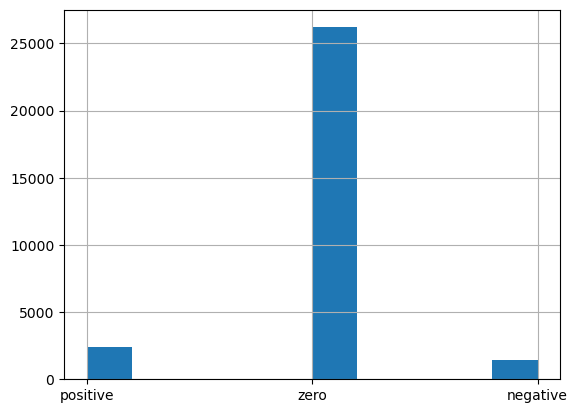

In [27]:
df['capital-diff_categorical'] = pd.cut(df['capital-diff'], bins=[-100000,-0.001,0.001,100000], labels=['negative', 'zero', 'positive'])

# Plot the distribution of the new feature capital-diff
df['capital-diff_categorical'].hist()

## 5. Outliers

As can be observed in the histograms, there are some outliers in the numerical variables. We will try to remove them, and we will see if it improves the results.

Among the variables that we have studied, age is not really affected by outliers, since even if there are some people with more than 80 years, they are not that many, and they are not that far from the rest of the distribution.

Also, we have categorized capital-diff, so we don't have to worry about outliers in this variable anymore.

Therefore, we need to focus on hours-per-week, since there are some people working more than 70 hours per week (more than 10 hours per day, 7 days per week).

<AxesSubplot:>

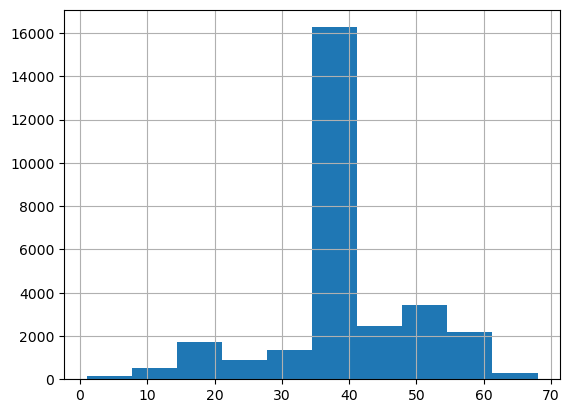

In [28]:
df_no_outliers = df[df['hours-per-week'] < 70]

# Plot the distribution of the new feature hours-per-week
df_no_outliers['hours-per-week'].hist()

This looks more reasonable.

## 6. Variable importance assessment

In [29]:
from scipy.stats import entropy

In [30]:
# entropy of the class for each feature
feat_entropy = {}

for feature in df.columns:
    if feature != 'class':
        # Compute entropy for each unique value of the feature
        entropies = df.groupby(feature)['class'].apply(lambda x: entropy(x.value_counts(normalize=True), base=2))
        # Compute weighted average of entropies
        #weights = df[feature].value_counts(normalize=True)
        feat_entropy[feature] = sum(entropies)


# Sort the features by entropy
sorted_feat_entropy = sorted(feat_entropy.items(), key=lambda x: x[1], reverse=True)
sorted_feat_entropy

[('hours-per-week', 54.77624254360021),
 ('age', 48.89802974956596),
 ('native-country', 26.486717542934176),
 ('occupation', 8.875654616223002),
 ('education', 8.850114255777324),
 ('education-num', 8.850114255777324),
 ('capital-diff', 6.929507004753189),
 ('capital-loss', 6.006693915470294),
 ('workclass', 5.27306775260837),
 ('marital-status', 3.9715230994143234),
 ('relationship', 3.1674306159057357),
 ('race', 3.1609000284009463),
 ('capital-diff_categorical', 2.683958432351135),
 ('capital-gain', 1.7358367907613224),
 ('sex', 1.3981036517885945)]

According to entropy, the most important variables are sex and capital gain. This means that knowing the value of these variables, we can predict the income with the least uncertainty. For instance, we saw how women are more likely to earn less than 50K, so when we know if a person is a woman or not, we can predict the income with less uncertainty.

Another measure that we can use is the mutual information. This measure is based on the information gain, but it is normalized, so it is easier to interpret.

In [31]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'target' is your target column

# Copy the data
df_encoded = df.copy()

# Apply LabelEncoder for categorical features
label_encoders = {}
for column in df_encoded.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

for column in df_encoded.select_dtypes(include='category').columns:
    df_encoded[column] = df_encoded[column].cat.codes

# Separate features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Calculate the mutual information
mutual_info = mutual_info_classif(X, y)

# Create a Series for better visualization
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Sort the series in descending order
mutual_info_series.sort_values(ascending=False, inplace=True)

# Print the series
print(mutual_info_series)

marital-status              0.109340
relationship                0.064358
age                         0.057812
capital-gain                0.056759
education-num               0.055007
capital-diff                0.050287
capital-diff_categorical    0.043030
occupation                  0.032850
hours-per-week              0.032719
sex                         0.027107
education                   0.016790
workclass                   0.014506
race                        0.010432
capital-loss                0.009762
native-country              0.005814
dtype: float64


In this case, we obtain that the most important variables are marital-status, relationship and education-num. This is different from the entropy, and in fact is more aligned with our previous assessment looking at the distributions of the variables. Observe that sex is not that important with this measure, in contrast with the entropy. 

Also, we observe that native country and workclass have quite low values, which means that the impact of our decision of removing the missing values is not that big.

Now, we have done quite a lot of preprocessing, and we can start to train our models and see how they perform.

For this, we will take several final datasets composed by:

Data set 1:
- The numerical variables except fnlwgt, capital-gain and capital-loss
- The categorical variables plus the capital-diff_categorical variable
- Education expressed using the numerical representation
- No missing values
- No outliers 

Data set 2:
- The numerical variables except fnlwgt, capital-gain and capital-loss
- The categorical variables plus the capital-diff_categorical variable
- Education expressed using the naming representation
- No missing values
- No outliers

Therefore, the difference between the two datasets is the representation of the education variable. We will see if this has an impact on the results.

In [32]:
df1 = df_no_outliers.drop(['capital-gain', 'capital-loss', 'capital-diff', 'education'], axis=1)
df1.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class,capital-diff_categorical
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,positive
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,zero
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,zero
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,zero
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,zero


In [33]:
df2 = df_no_outliers.drop(['capital-gain', 'capital-loss', 'capital-diff', 'education-num'], axis=1)
df2.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class,capital-diff_categorical
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,positive
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,zero
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,zero
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,zero
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,zero


# Models

It is time to train our models and see how they perform. We will use the following models:

1. Logistic regression
2. Decision tree
3. Naive Bayes
4. Random forest
5. Gradient boosting
6. Neural network

First, we divide the dataset into train and test:

In [34]:
from sklearn.model_selection import train_test_split

# We split the data into train and test, with a 80/20 split. 
# The 2 datasets must be split with the same records
np.random.seed(0)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df1.drop(['class'], axis=1), df1['class'], test_size=0.2, random_state=42)
np.random.seed(0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df2.drop(['class'], axis=1), df2['class'], test_size=0.2, random_state=42)

# This way of doing it works:
compare = X_train_1.index == X_train_2.index
compare.all()

True

Now, we can proceed with the training phase.

## Training

### 1. Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Logistic regression only works with numerical variables, so we have to encode the categorical variables. We will use one-hot encoding, because we saw that only variable that made sense to directly transform into a numerical variable was education, and this is already done in the dataset 2.

In [36]:
X_train_1_hot = pd.get_dummies(X_train_1)
X_train_2_hot = pd.get_dummies(X_train_2)

Now, we can train the model. In this case, cross-validation is not necessary, because we are not tuning any hyperparameter.

In [37]:
# Create an instance of LogisticRegression
logistic_model_1 = LogisticRegression()

# Fit the model using the training data
logistic_model_1.fit(X_train_1_hot, y_train_1)

/home/jose/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Make predictions on the testing data
y_pred_1 = logistic_model_1.predict(X_train_1_hot)

# Calculate the classification report and confusion matrix
print(classification_report(y_train_1, y_pred_1))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     17709
        >50K       0.71      0.59      0.65      5726

    accuracy                           0.84     23435
   macro avg       0.79      0.76      0.77     23435
weighted avg       0.84      0.84      0.84     23435



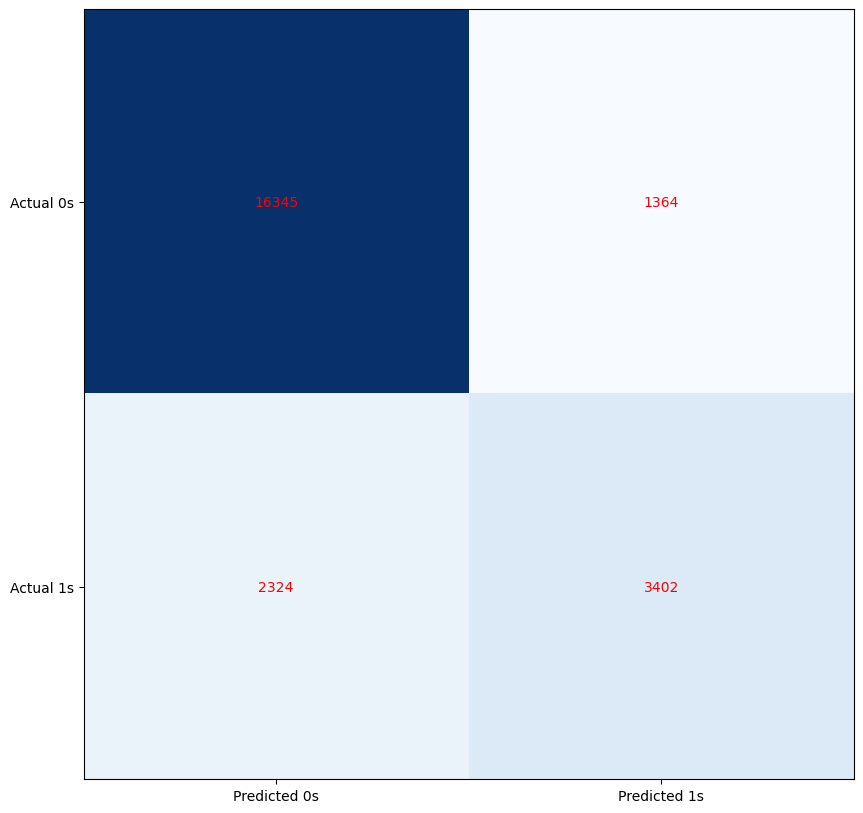

In [39]:
conf_mat1 = confusion_matrix(y_train_1, y_pred_1)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat1, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat1[i, j], ha='center', va='center', color='red')

plt.show()

As we expected, the model tends to predict <50, because the dataset is a bit skewed towards this class. However, the model is able to predict the other class as well, which is good.

Now, we can do the same with the dataset 2:

In [40]:
# Create an instance of LogisticRegression
logistic_model_2 = LogisticRegression()

# Fit the model using the training data
logistic_model_2.fit(X_train_2_hot, y_train_2)

# Make predictions on the training data
y_pred_2 = logistic_model_2.predict(X_train_2_hot)

# Calculate the classification report and confusion matrix
print(classification_report(y_train_2, y_pred_2))

/home/jose/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90     17709
        >50K       0.71      0.59      0.64      5726

    accuracy                           0.84     23435
   macro avg       0.79      0.76      0.77     23435
weighted avg       0.83      0.84      0.84     23435



Note that we are evaluating the model with the training data, and not the test data. We will do after we have trained our models, so we can select a definitive one.

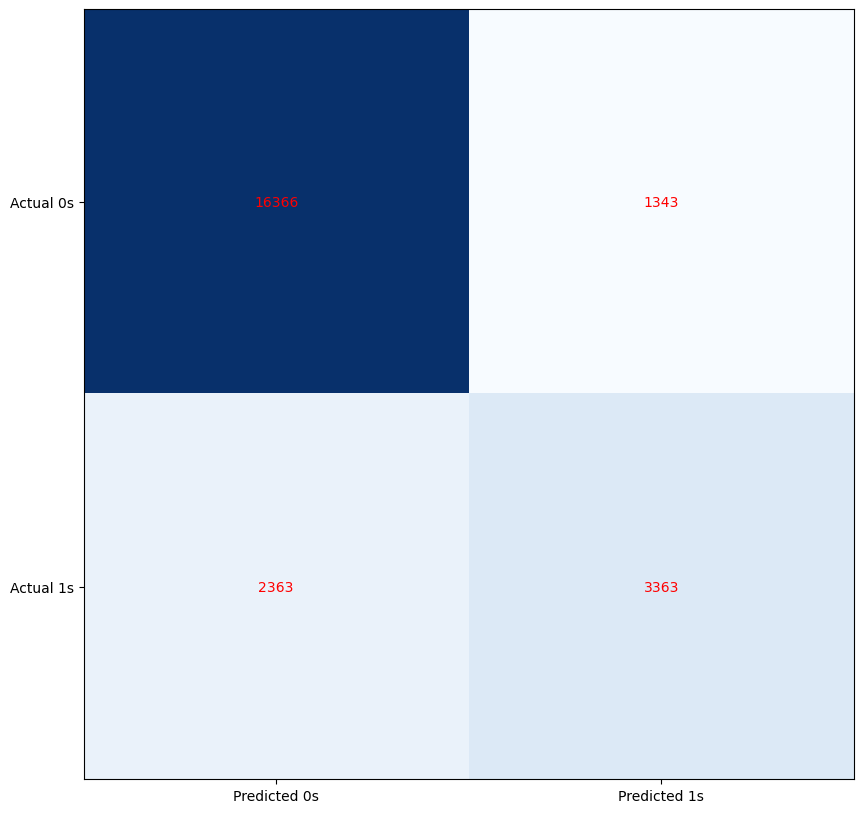

In [41]:
conf_mat2 = confusion_matrix(y_train_2, y_pred_2)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat1, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat2[i, j], ha='center', va='center', color='red')

plt.show()

The models seems to be very similar, we can check this by comparing the two predictions:

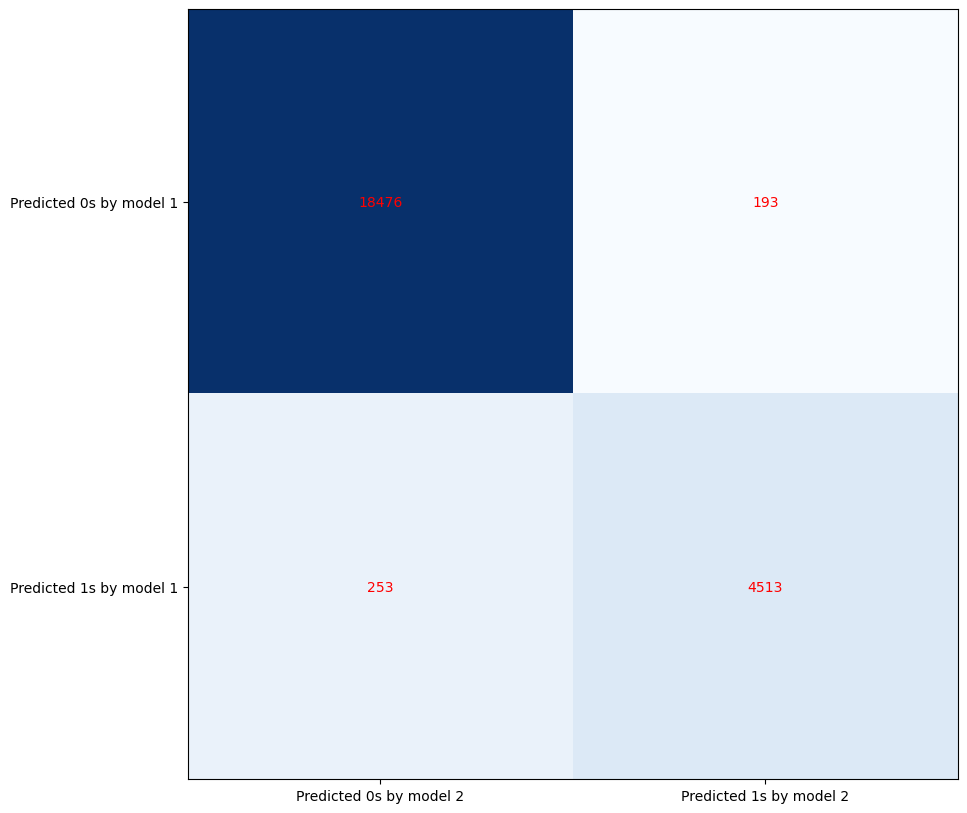

In [42]:
conf_mat_crossed = confusion_matrix(y_pred_1, y_pred_2)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat1, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s by model 2', 'Predicted 1s by model 2'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Predicted 0s by model 1', 'Predicted 1s by model 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat_crossed[i, j], ha='center', va='center', color='red')

plt.show()

We observe how the predictions are very similar, indeed.

We can try to improve the model by adding regularization. We will use L2 regularization, and we will tune the hyperparameter C, which is the inverse of the regularization strength.

In [43]:
# Logistic with regularization
from sklearn.linear_model import LogisticRegressionCV

# Create an instance of LogisticRegressionCV
# Cs: list of regularization values to try
# cv: number of folds to use for cross-validation
logistic_model_cv_1 = LogisticRegressionCV(Cs=[10,1,0.1,0.01,0.001], cv=5, penalty='l2', scoring='f1_weighted', solver='liblinear', max_iter=1000)

# Fit the model using the training data
logistic_model_cv_1.fit(X_train_1_hot, y_train_1)

# Obtain the cross-validation scores for the different values of C
scores = logistic_model_cv_1.scores_['>50K']  # assume binary classification

# Compute the mean score for each C across folds
mean_scores = np.mean(scores, axis=0)

# Print the mean scores
for C, score in zip(logistic_model_cv_1.Cs_, mean_scores):
    print(f'Mean CV accuracy score for C={C}: {score}')

Mean CV accuracy score for C=10.0: 0.8373482601964767
Mean CV accuracy score for C=1.0: 0.8376162578958748
Mean CV accuracy score for C=0.1: 0.8368282678634997
Mean CV accuracy score for C=0.01: 0.8294112707502782
Mean CV accuracy score for C=0.001: 0.7712338419473446


Therefore, the best value is C=1. 

We don't need to re-train the model using just C=1, because the fit function re-trains using the best found parameter by default.

Now, we can use the model to predict the training data, as we did with the previous model:

In [44]:

y_pred_reg_1 = logistic_model_cv_1.predict(X_train_1_hot)

# Calculate the classification report and confusion matrix
print(classification_report(y_train_1, y_pred_reg_1))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     17709
        >50K       0.72      0.59      0.65      5726

    accuracy                           0.84     23435
   macro avg       0.80      0.76      0.77     23435
weighted avg       0.84      0.84      0.84     23435



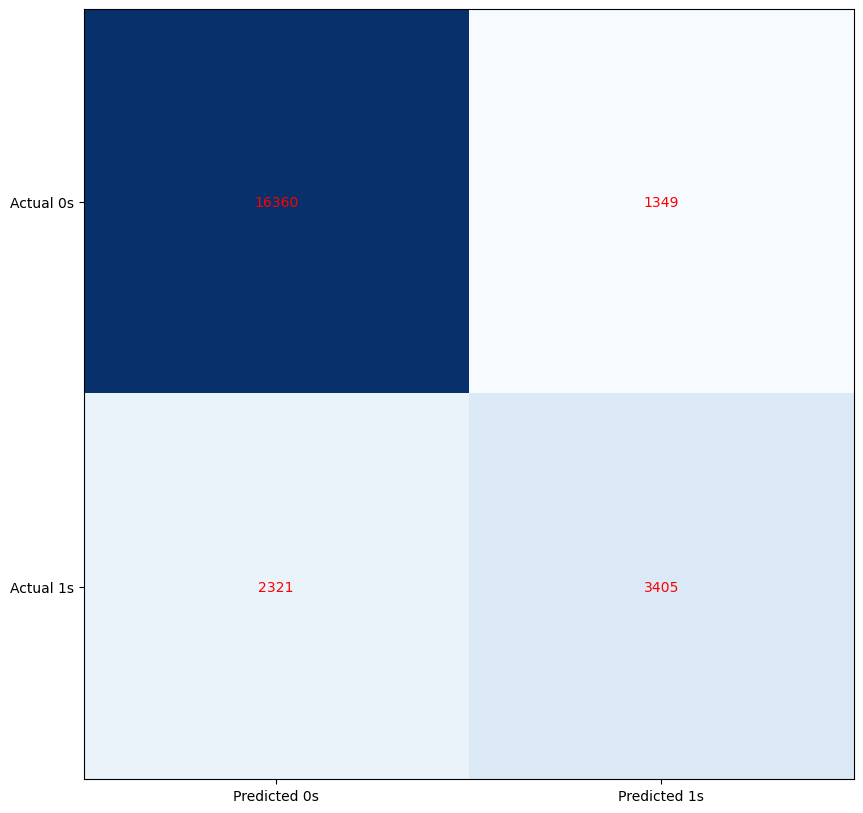

In [45]:
conf_mat_reg_1 = confusion_matrix(y_train_1, y_pred_reg_1)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat_reg_1, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat_reg_1[i, j], ha='center', va='center', color='red')

plt.show()

The predictions are still very similar. It is not necessary to repeat this for the second dataset, because the results will be the same.

It is interesting though to train a model on the raw dataset, to see if the preprocessing has any impact on the results:

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      4942
        >50K       0.73      0.27      0.39      1571

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.80      0.76      6513



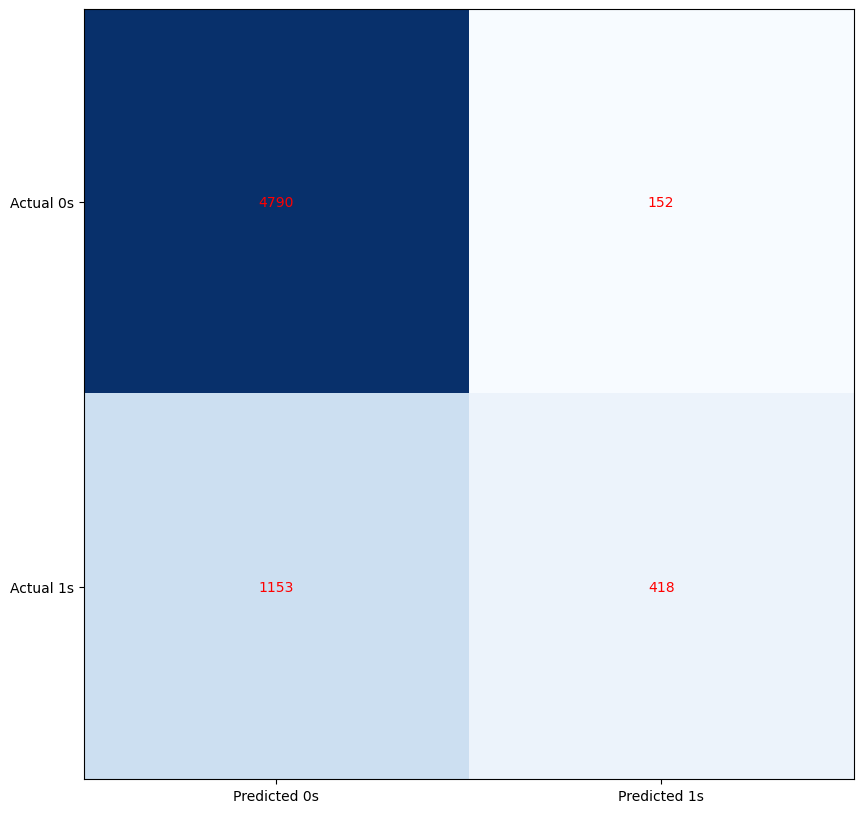

In [46]:
df_orig = pd.read_csv(filename_csv, header=None, na_values='?',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

df_orig_hot = pd.get_dummies(df_orig.drop(['class'], axis=1))
df_orig_hot['class'] = df_orig['class']

features = df_orig_hot.drop(['class'], axis=1).columns

np.random.seed(0)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(df_orig_hot[features], df_orig_hot['class'], test_size=0.2, random_state=42)

logistic_model_orig = LogisticRegression()
logistic_model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = logistic_model_orig.predict(X_test_orig)

print(classification_report(y_test_orig, y_pred_orig))

conf_mat_orig = confusion_matrix(y_test_orig, y_pred_orig)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat_orig, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat_orig[i, j], ha='center', va='center', color='red')

plt.show()

Let's use the test data for a second in our previous model, to compare the results:

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4474
        >50K       0.70      0.59      0.64      1385

    accuracy                           0.84      5859
   macro avg       0.79      0.75      0.77      5859
weighted avg       0.83      0.84      0.84      5859



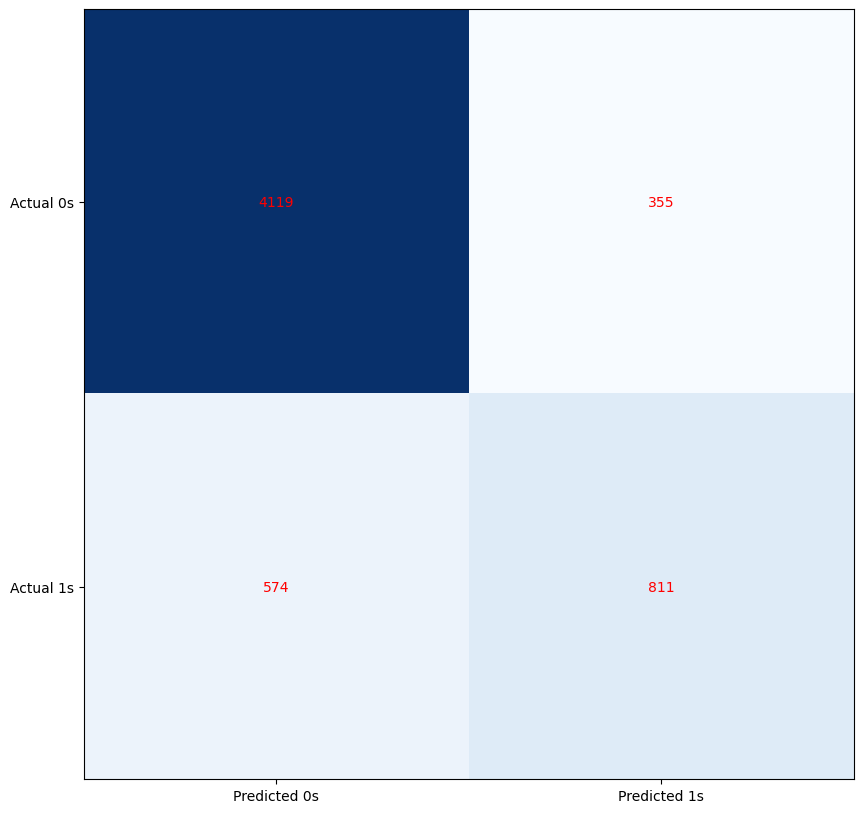

In [47]:
X_test_1_hot = pd.get_dummies(X_test_1)
# We need to add all columns from X_train_1_hot that are not in X_test_1_hot
missing_cols = set(X_train_1_hot.columns) - set(X_test_1_hot.columns)
for c in missing_cols:
    X_test_1_hot[c] = 0

# We also have to remove all columns from X_test_1_hot that are not in X_train_1_hot
X_test_1_hot = X_test_1_hot[X_train_1_hot.columns]

y_pred_1 = logistic_model_1.predict(X_test_1_hot)

print(classification_report(y_test_1, y_pred_1))

conf_mat_1 = confusion_matrix(y_test_1, y_pred_1)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat_1, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat_1[i, j], ha='center', va='center', color='red')

plt.show()


We can in fact see how the preprocessing we have done is useful, because the model performs better on the test data. It is specially relevant that the model becomes more 'brave', and predicts more often the >50 class.

### 2. Decision tree

Now, we can train a decision tree. Since logistic regression has told us that both our datasets are very similar, we are going to make another assessment of this, by training a decision tree with both datasets, and see if the results are similar. If so, we will only use the second dataset, because education is encoded as numbers, instead of one-hot encoding, which means the models have less variables to work with, and therefore it is less prone to overfitting.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [49]:
import warnings
warnings.filterwarnings('ignore')
# Train decision trees with different maximum depths, using cross-validation to find the optimal depth
depths = [1, 2, 3, 4, 5, 10, 20, 50, 100, 1000]

splits = 5
splits_1 = X_train_1_hot.shape[0] // splits

scores_1 = []
for d in depths:
    print(f'Cross-validating with max_depth={d}')
    scores = []
    for i in range(splits):
        # Split the data into a training and test set
        X_train_1_ = np.concatenate((X_train_1_hot[:i*splits_1], X_train_1_hot[(i+1)*splits_1:]), axis=0)
        y_train_1_ = np.concatenate((y_train_1[:i*splits_1], y_train_1[(i+1)*splits_1:]), axis=0)
        X_test_1_ = X_train_1_hot[i*splits_1:(i+1)*splits_1]
        y_test_1_ = y_train_1[i*splits_1:(i+1)*splits_1]

        # Create an instance of the classifier using f1_score as the evaluation metric
        decision_tree_1 = DecisionTreeClassifier(max_depth=d)

        # Fit the classifier to the training data
        decision_tree_1.fit(X_train_1_, y_train_1_)

        # Evaluate the model on the test data
        scores.append(f1_score(y_test_1_, decision_tree_1.predict(X_test_1_), pos_label='>50K', average='weighted'))
    scores_1.append(np.mean(scores))
    print(f'Max depth: {d} \t\t Test f1: {np.mean(scores)}')

Cross-validating with max_depth=1


Max depth: 1 		 Test f1: 0.6505047869907409
Cross-validating with max_depth=2
Max depth: 2 		 Test f1: 0.7987700290842361
Cross-validating with max_depth=3
Max depth: 3 		 Test f1: 0.8221246887835603
Cross-validating with max_depth=4
Max depth: 4 		 Test f1: 0.8236877229247535
Cross-validating with max_depth=5
Max depth: 5 		 Test f1: 0.8238585704447601
Cross-validating with max_depth=10
Max depth: 10 		 Test f1: 0.8246899978987317
Cross-validating with max_depth=20
Max depth: 20 		 Test f1: 0.8048808771515652
Cross-validating with max_depth=50
Max depth: 50 		 Test f1: 0.7910143212666593
Cross-validating with max_depth=100
Max depth: 100 		 Test f1: 0.7912107399196653
Cross-validating with max_depth=1000
Max depth: 1000 		 Test f1: 0.7907148262431647


Therefore, the best accuracy is reached with max_depth=5. We can train a final tree with this parameter:

In [50]:
decision_tree_1 = DecisionTreeClassifier(max_depth=depths[np.argmax(scores_1)])
decision_tree_1.fit(X_train_1_hot, y_train_1)

y_pred_tree_1 = decision_tree_1.predict(X_train_1_hot)

# Calculate the classification report
print(classification_report(y_train_1, y_pred_tree_1))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     17709
        >50K       0.78      0.60      0.68      5726

    accuracy                           0.86     23435
   macro avg       0.83      0.78      0.80     23435
weighted avg       0.86      0.86      0.86     23435



Now, with the second dataset:

In [51]:
splits_2 = X_train_2_hot.shape[0] // splits

scores_2 = []
for d in depths:
    print(f'Cross-validating with max_depth={d}')
    scores = []
    for i in range(splits):
        # Split the data into a training and test set
        X_train_2_ = np.concatenate((X_train_2_hot[:i*splits_2], X_train_2_hot[(i+1)*splits_2:]), axis=0)
        y_train_2_ = np.concatenate((y_train_2[:i*splits_2], y_train_2[(i+1)*splits_2:]), axis=0)
        X_test_2_ = X_train_2_hot[i*splits_2:(i+1)*splits_2]
        y_test_2_ = y_train_2[i*splits_2:(i+1)*splits_2]

        # Create an instance of the classifier
        decision_tree_2 = DecisionTreeClassifier(max_depth=d)

        # Fit the classifier to the training data
        decision_tree_2.fit(X_train_2_, y_train_2_)

        # Evaluate the model on the test data
        scores.append(f1_score(y_test_2_, decision_tree_2.predict(X_test_2_), pos_label='>50K', average='weighted'))
    scores_2.append(np.mean(scores))
    print(f'Max depth: {d} \t\t Test f1: {np.mean(scores)}')

Cross-validating with max_depth=1
Max depth: 1 		 Test f1: 0.6505047869907409
Cross-validating with max_depth=2
Max depth: 2 		 Test f1: 0.7524043903005216
Cross-validating with max_depth=3
Max depth: 3 		 Test f1: 0.7943339342861926
Cross-validating with max_depth=4
Max depth: 4 		 Test f1: 0.8103346138403094
Cross-validating with max_depth=5
Max depth: 5 		 Test f1: 0.8254907399905773
Cross-validating with max_depth=10
Max depth: 10 		 Test f1: 0.8272921919162721
Cross-validating with max_depth=20
Max depth: 20 		 Test f1: 0.8012278683653017
Cross-validating with max_depth=50
Max depth: 50 		 Test f1: 0.7900030761421191
Cross-validating with max_depth=100
Max depth: 100 		 Test f1: 0.7901222738004039
Cross-validating with max_depth=1000
Max depth: 1000 		 Test f1: 0.7895114623726044


In [52]:
decision_tree_2 = DecisionTreeClassifier(max_depth=depths[np.argmax(scores_2)])

decision_tree_2.fit(X_train_2_hot, y_train_2)

y_pred_tree_2 = decision_tree_2.predict(X_train_2_hot)

# Calculate the classification report
print(classification_report(y_train_2, y_pred_tree_2))

              precision    recall  f1-score   support

       <=50K       0.90      0.92      0.91     17709
        >50K       0.74      0.67      0.70      5726

    accuracy                           0.86     23435
   macro avg       0.82      0.80      0.81     23435
weighted avg       0.86      0.86      0.86     23435



We are obtaining slightly better measures using the second dataset. Therefore, we will use this one for the rest of the models.

### 3. Naive Bayes

Now, we can train a Naive Bayes model. We will use the GaussianNB from sklearn, which is the one that works with numerical variables.

Then, we will add Laplace smoothing, to see if it improves the results. We will tune the hyperparameter alpha, which is the smoothing parameter.

In [53]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

       <=50K       0.96      0.47      0.63     17709
        >50K       0.36      0.93      0.52      5726

    accuracy                           0.59     23435
   macro avg       0.66      0.70      0.58     23435
weighted avg       0.81      0.59      0.61     23435



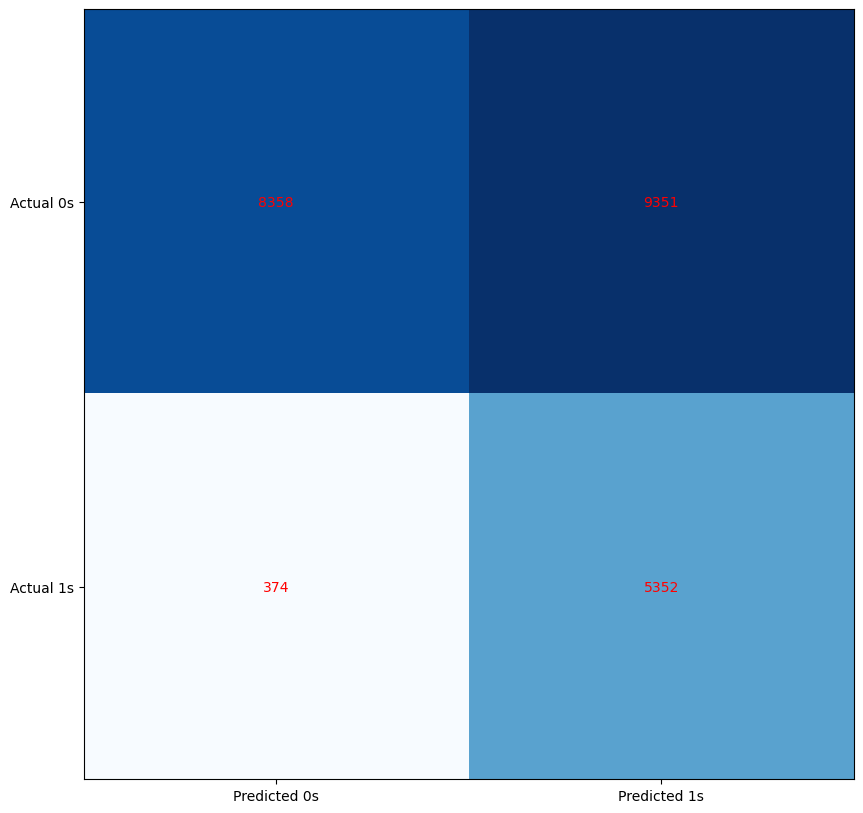

In [54]:
gnb = GaussianNB()
gnb.fit(X_train_2_hot, y_train_2)

y_pred = gnb.predict(X_train_2_hot)

print(classification_report(y_train_2, y_pred))

conf_mat2 = confusion_matrix(y_train_2, y_pred)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat2, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat2[i, j], ha='center', va='center', color='red')

plt.show()

In this case, the model becomes 'too brave', and predicts too often the >50 class. This is a bit counterintuitive, because we would expect that the model would predict more often the <50 class, since the dataset is skewed towards this class. Nonetheless, hopefully adding Laplace smoothing will improve the results.

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

splits = 5

splits_2 = X_train_2_hot.shape[0] // splits
scores_2 = []

for a in alphas:
    print(f'Cross-validating with alpha={a}')
    scores = []
    for i in range(splits):
        # Split the data into a training and test set
        X_train_2_ = np.concatenate((X_train_2_hot[:i*splits_2], X_train_2_hot[(i+1)*splits_2:]), axis=0)
        y_train_2_ = np.concatenate((y_train_2[:i*splits_2], y_train_2[(i+1)*splits_2:]), axis=0)
        X_test_2_ = X_train_2_hot[i*splits_2:(i+1)*splits_2]
        y_test_2_ = y_train_2[i*splits_2:(i+1)*splits_2]

        # Create an instance of the classifier
        multinomial_nb_2 = MultinomialNB(alpha=a)

        # Fit the classifier to the training data
        multinomial_nb_2.fit(X_train_2_, y_train_2_)

        # Evaluate the model on the test data
        scores.append(f1_score(y_test_2_, multinomial_nb_2.predict(X_test_2_), pos_label='>50K', average='weighted'))
    scores_2.append(np.mean(scores))
    print(f'Alpha: {a} \t\t Test f1: {np.mean(scores)}')

Cross-validating with alpha=0.001


Alpha: 0.001 		 Test f1: 0.814552719236507
Cross-validating with alpha=0.01
Alpha: 0.01 		 Test f1: 0.8145970555596144
Cross-validating with alpha=0.1
Alpha: 0.1 		 Test f1: 0.8146039669460009
Cross-validating with alpha=1
Alpha: 1 		 Test f1: 0.814662271687012
Cross-validating with alpha=10
Alpha: 10 		 Test f1: 0.8128405865467503
Cross-validating with alpha=100
Alpha: 100 		 Test f1: 0.8140011875359647
Cross-validating with alpha=1000
Alpha: 1000 		 Test f1: 0.6504838416808123


In [57]:
multinomial_nb_2 = MultinomialNB(alpha=alphas[np.argmax(scores_2)])
multinomial_nb_2.fit(X_train_2_hot, y_train_2)

y_pred_multinomial_nb_2 = multinomial_nb_2.predict(X_train_2_hot)

# Calculate the classification report
print(classification_report(y_train_2, y_pred_multinomial_nb_2))

              precision    recall  f1-score   support

       <=50K       0.91      0.83      0.87     17709
        >50K       0.58      0.75      0.66      5726

    accuracy                           0.81     23435
   macro avg       0.75      0.79      0.76     23435
weighted avg       0.83      0.81      0.82     23435



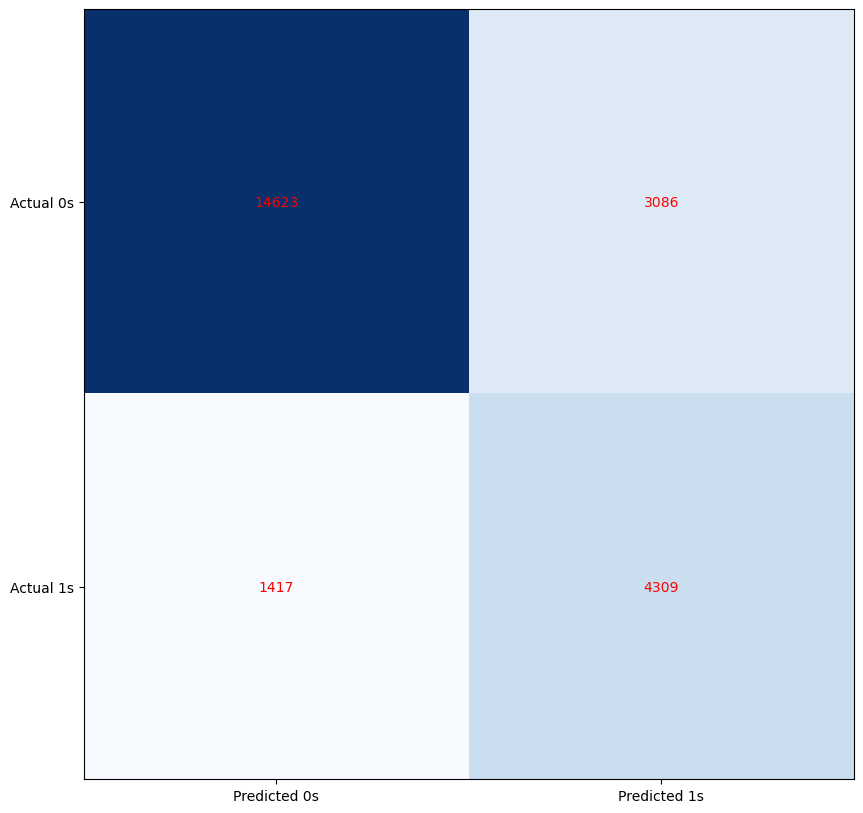

In [58]:
conf_mat = confusion_matrix(y_train_2, y_pred_multinomial_nb_2)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')

plt.show()

Indeed, the model performs better with Laplace smoothing. We can see that the model is now more balanced, and predicts more often the <50 class. Note that it stills tries to predict the >50 class more often than the logistic regression model.

### 4. Random forest

Now, we can train a random forest. We will use the RandomForestClassifier from sklearn, and will do a grid search to tune the hyperparameters.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
n_estimators = [10, 50, 100]
max_depths = [5, 10, 15, 20, 25, 30]
max_features = [0.1, 0.25, 0.5, 0.75, 1.0]

splits = 5

splits_2 = X_train_2_hot.shape[0] // splits

scores_2 = {}

for n in n_estimators:
    scores_2[n] = {}
    for d in max_depths:
        scores_2[n][d] = {}
        for f in max_features:
            scores_2[n][d][f] = []
            for i in range(splits):
                # Split the data into a training and test set
                X_train_2_ = np.concatenate((X_train_2_hot[:i*splits_2], X_train_2_hot[(i+1)*splits_2:]), axis=0)
                y_train_2_ = np.concatenate((y_train_2[:i*splits_2], y_train_2[(i+1)*splits_2:]), axis=0)
                X_test_2_ = X_train_2_hot[i*splits_2:(i+1)*splits_2]
                y_test_2_ = y_train_2[i*splits_2:(i+1)*splits_2]

                # Create an instance of the classifier
                random_forest_2 = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)

                # Fit the classifier to the training data
                random_forest_2.fit(X_train_2_, y_train_2_)

                # Evaluate the model on the test data
                scores_2[n][d][f].append(f1_score(y_test_2_, random_forest_2.predict(X_test_2_), pos_label='>50K', average='weighted'))
            scores_2[n][d][f] = np.mean(scores_2[n][d][f])
            print(f'n_estimators: {n} \t max_depth: {d} \t max_features: {f} \t\t Test f1: {scores_2[n][d][f]}')

n_estimators: 10 	 max_depth: 5 	 max_features: 0.1 		 Test f1: 0.7849019838353517
n_estimators: 10 	 max_depth: 5 	 max_features: 0.25 		 Test f1: 0.809161710678015
n_estimators: 10 	 max_depth: 5 	 max_features: 0.5 		 Test f1: 0.8241589300978044
n_estimators: 10 	 max_depth: 5 	 max_features: 0.75 		 Test f1: 0.8269062345381826
n_estimators: 10 	 max_depth: 5 	 max_features: 1.0 		 Test f1: 0.8252691803704014
n_estimators: 10 	 max_depth: 10 	 max_features: 0.1 		 Test f1: 0.828626200452908
n_estimators: 10 	 max_depth: 10 	 max_features: 0.25 		 Test f1: 0.8312306040321309
n_estimators: 10 	 max_depth: 10 	 max_features: 0.5 		 Test f1: 0.8334662767810549
n_estimators: 10 	 max_depth: 10 	 max_features: 0.75 		 Test f1: 0.8330139711889146
n_estimators: 10 	 max_depth: 10 	 max_features: 1.0 		 Test f1: 0.8342517358200141
n_estimators: 10 	 max_depth: 15 	 max_features: 0.1 		 Test f1: 0.8324784416213493
n_estimators: 10 	 max_depth: 15 	 max_features: 0.25 		 Test f1: 0.83205829239

In [61]:
best_n_estimators = 0
best_max_depth = 0
best_max_features = 0
best_score = 0

for n in n_estimators:
    for d in max_depths:
        for f in max_features:
            score = np.mean(scores_2[n][d][f])
            if score > best_score:
                best_n_estimators = n
                best_max_depth = d
                best_max_features = f
                best_score = score

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'Best max_features: {best_max_features}')
print(f'Best score: {best_score}')

Best n_estimators: 50
Best max_depth: 10
Best max_features: 0.75
Best score: 0.8369292267688738


In [62]:
random_forest_2 = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

random_forest_2.fit(X_train_2_hot, y_train_2)

y_pred_random_forest_2 = random_forest_2.predict(X_train_2_hot)

# Calculate the classification report
print(classification_report(y_train_2, y_pred_random_forest_2))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92     17709
        >50K       0.78      0.64      0.70      5726

    accuracy                           0.87     23435
   macro avg       0.84      0.79      0.81     23435
weighted avg       0.86      0.87      0.86     23435



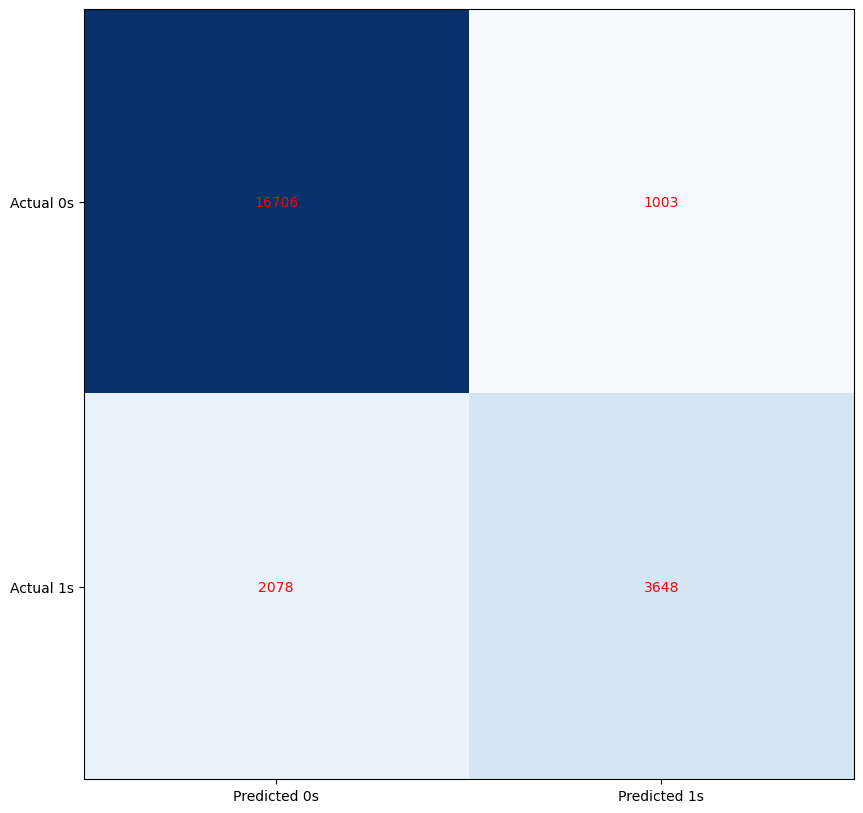

In [63]:
conf_mat = confusion_matrix(y_train_2, y_pred_random_forest_2)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')

plt.show()

As we can see, the best accuracy is reached with n_estimators=100, max_depth=15 and max_features=0.1. We have then trained a final model with these parameters, and the results are the best so far, regarding the accuracy over the training data. Specially, we observe that this model has less mistakes when predicting the >50 class (i.e, smaller false positives).

### 5. Gradient boosting

Now, we can train a gradient boosting model. We will use the GradientBoostingClassifier from sklearn, and will do a grid search to tune the hyperparameters.

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
# parameters for gradient boosting
n_estimators = [10, 50, 100]
max_depths = [5, 10, 15, 20, 25, 30]
max_features = [0.1, 0.25, 0.5, 0.75, 1.0]

splits = 5

splits_2 = X_train_2_hot.shape[0] // splits

scores_2 = {}

for n in n_estimators:
    scores_2[n] = {}
    for d in max_depths:
        scores_2[n][d] = {}
        for f in max_features:
            scores_2[n][d][f] = []
            for i in range(splits):
                # Split the data into a training and test set
                X_train_2_ = np.concatenate((X_train_2_hot[:i*splits_2], X_train_2_hot[(i+1)*splits_2:]), axis=0)
                y_train_2_ = np.concatenate((y_train_2[:i*splits_2], y_train_2[(i+1)*splits_2:]), axis=0)
                X_test_2_ = X_train_2_hot[i*splits_2:(i+1)*splits_2]
                y_test_2_ = y_train_2[i*splits_2:(i+1)*splits_2]

                # Create an instance of the classifier
                gradient_boosting_2 = GradientBoostingClassifier(n_estimators=n, max_depth=d, max_features=f)

                # Fit the classifier to the training data
                gradient_boosting_2.fit(X_train_2_, y_train_2_)

                # Evaluate the model on the test data
                scores_2[n][d][f].append(f1_score(y_test_2_, gradient_boosting_2.predict(X_test_2_), pos_label='>50K', average='weighted'))
            scores_2[n][d][f] = np.mean(scores_2[n][d][f])
            print(f'n_estimators: {n} \t max_depth: {d} \t max_features: {f} \t\t Test f1: {scores_2[n][d][f]}')

n_estimators: 10 	 max_depth: 5 	 max_features: 0.1 		 Test f1: 0.7385674467347842
n_estimators: 10 	 max_depth: 5 	 max_features: 0.25 		 Test f1: 0.7791240408320155
n_estimators: 10 	 max_depth: 5 	 max_features: 0.5 		 Test f1: 0.7911051017931976
n_estimators: 10 	 max_depth: 5 	 max_features: 0.75 		 Test f1: 0.7970129435466748
n_estimators: 10 	 max_depth: 5 	 max_features: 1.0 		 Test f1: 0.7975886791873827
n_estimators: 10 	 max_depth: 10 	 max_features: 0.1 		 Test f1: 0.7941745660984474
n_estimators: 10 	 max_depth: 10 	 max_features: 0.25 		 Test f1: 0.8122126586615528
n_estimators: 10 	 max_depth: 10 	 max_features: 0.5 		 Test f1: 0.8167471824810517
n_estimators: 10 	 max_depth: 10 	 max_features: 0.75 		 Test f1: 0.8169618898728525
n_estimators: 10 	 max_depth: 10 	 max_features: 1.0 		 Test f1: 0.8162047269657455
n_estimators: 10 	 max_depth: 15 	 max_features: 0.1 		 Test f1: 0.8098668144998273
n_estimators: 10 	 max_depth: 15 	 max_features: 0.25 		 Test f1: 0.814819424

In [66]:
best_n_estimators = 0
best_max_depth = 0
best_max_features = 0
best_score = 0

for n in n_estimators:
    for d in max_depths:
        for f in max_features:
            score = np.mean(scores_2[n][d][f])
            if score > best_score:
                best_n_estimators = n
                best_max_depth = d
                best_max_features = f
                best_score = score

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'Best max_features: {best_max_features}')
print(f'Best score: {best_score}')

Best n_estimators: 100
Best max_depth: 5
Best max_features: 0.25
Best score: 0.8435655339832154


In [67]:
xgb_2 = GradientBoostingClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

xgb_2.fit(X_train_2_hot, y_train_2)

y_pred_xgb_2 = xgb_2.predict(X_train_2_hot)

# Calculate the classification report
print(classification_report(y_train_2, y_pred_xgb_2))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     17709
        >50K       0.76      0.64      0.69      5726

    accuracy                           0.86     23435
   macro avg       0.82      0.79      0.80     23435
weighted avg       0.86      0.86      0.86     23435



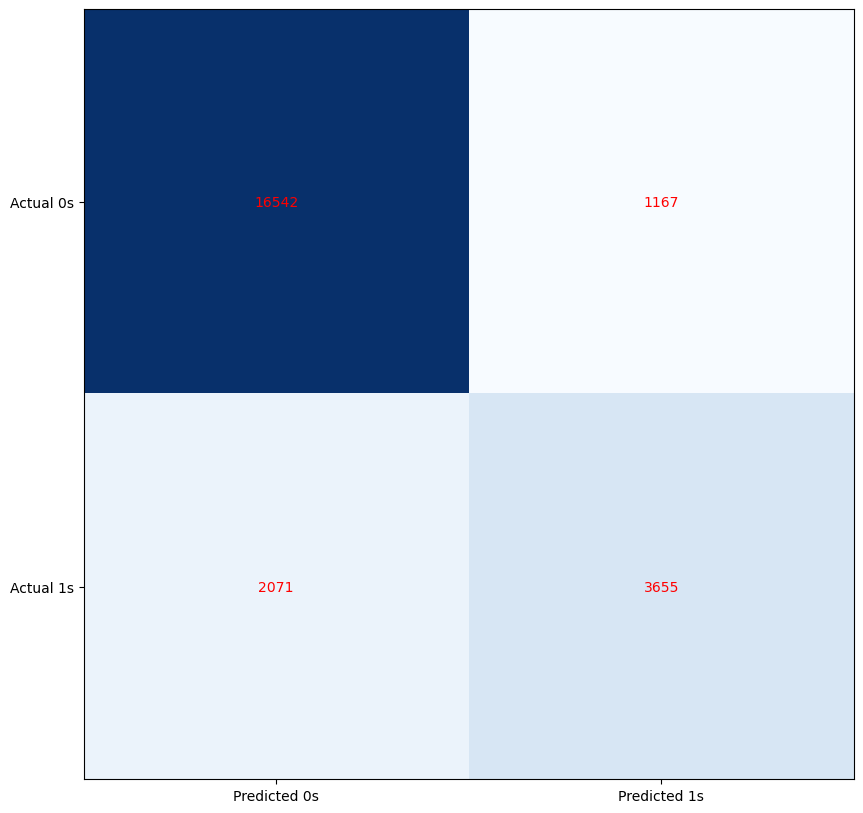

In [68]:
conf_mat = confusion_matrix(y_train_2, y_pred_xgb_2)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')

plt.show()

### 6. Neural network

Finally, we can train a neural network. We will use the MLPClassifier from sklearn, and will do a grid search to tune the hyperparameters.

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [70]:
# parameters for neural network
alphas = [0.01, 0.1, 1.0] # regularization parameter
learning_rates = [0.001, 0.01, 0.1] # learning rate
hidden_layer_sizes = [(10,), (50,), (10,10), (50,50)]
activation = ['logistic', 'relu']

scaler = StandardScaler()

X_train_2_hot_scaled = scaler.fit_transform(X_train_2_hot)

splits = 5

splits_2 = X_train_2_hot_scaled.shape[0] // splits

scores_2 = {}

for a in alphas:
    scores_2[a] = {}
    for l in learning_rates:
        scores_2[a][l] = {}
        for h in hidden_layer_sizes:
            scores_2[a][l][h] = {}
            for act in activation:
                scores_2[a][l][h][act] = []
                for i in range(splits):
                    # Split the data into a training and test set
                    X_train_2_ = np.concatenate((X_train_2_hot_scaled[:i*splits_2], X_train_2_hot_scaled[(i+1)*splits_2:]), axis=0)
                    y_train_2_ = np.concatenate((y_train_2[:i*splits_2], y_train_2[(i+1)*splits_2:]), axis=0)
                    X_test_2_ = X_train_2_hot_scaled[i*splits_2:(i+1)*splits_2]
                    y_test_2_ = y_train_2[i*splits_2:(i+1)*splits_2]

                    # Create an instance of the classifier, we use the default adam solver with 100 batches and our chosen parameters
                    if act == 'logistic':
                        mlp_2 = MLPClassifier(alpha=a, learning_rate_init=l, hidden_layer_sizes=h, activation='logistic', max_iter=100, random_state=42)
                    elif act == 'tanh':
                        mlp_2 = MLPClassifier(alpha=a, learning_rate_init=l, hidden_layer_sizes=h, activation='tanh', max_iter=100, random_state=42)
                    else:
                        mlp_2 = MLPClassifier(alpha=a, learning_rate_init=l, hidden_layer_sizes=h, activation='relu', max_iter=100, random_state=42)

                    # Fit the classifier to the training data
                    mlp_2.fit(X_train_2_, y_train_2_)

                    # Evaluate the model on the test data
                    scores_2[a][l][h][act].append(f1_score(y_test_2_, mlp_2.predict(X_test_2_), pos_label='>50K', average='weighted'))
                scores_2[a][l][h][act] = np.mean(scores_2[a][l][h][act])
                print(f'alpha: {a} \t learning_rate: {l} \t hidden_layer_sizes: {h} \t activation: {act} \t\t Test f1: {scores_2[a][l][h][act]}')

alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (10,) 	 activation: logistic 		 Test f1: 0.8419771342210248
alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (10,) 	 activation: relu 		 Test f1: 0.8423817107428674
alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (50,) 	 activation: logistic 		 Test f1: 0.8419241285011294
alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (50,) 	 activation: relu 		 Test f1: 0.8360518156064686
alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (10, 10) 	 activation: logistic 		 Test f1: 0.8442070797533019
alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (10, 10) 	 activation: relu 		 Test f1: 0.8359437347228752
alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (50, 50) 	 activation: logistic 		 Test f1: 0.8381339316052285
alpha: 0.01 	 learning_rate: 0.001 	 hidden_layer_sizes: (50, 50) 	 activation: relu 		 Test f1: 0.8220931377592647
alpha: 0.01 	 learning_rate: 0.01 	 hidden_layer_sizes: (10,) 	 acti

In [71]:
best_alpha = 0
best_learning_rate = 0
best_hidden_layer_size = 0
best_activation = ''
best_score = 0

for a in alphas:
    for l in learning_rates:
        for h in hidden_layer_sizes:
            for act in activation:
                score = np.mean(scores_2[a][l][h][act])
                if score > best_score:
                    best_alpha = a
                    best_learning_rate = l
                    best_hidden_layer_size = h
                    best_activation = act
                    best_score = score

print(f'Best alpha: {best_alpha}')
print(f'Best learning_rate: {best_learning_rate}')
print(f'Best hidden_layer_size: {best_hidden_layer_size}')
print(f'Best activation: {best_activation}')
print(f'Best score: {best_score}')

Best alpha: 0.01
Best learning_rate: 0.001
Best hidden_layer_size: (10, 10)
Best activation: logistic
Best score: 0.8442070797533019


In [72]:
if best_activation == 'logistic':
    mlp_2 = MLPClassifier(alpha=best_alpha, learning_rate_init=best_learning_rate, hidden_layer_sizes=best_hidden_layer_size, activation='logistic', max_iter=100, random_state=42)
elif best_activation == 'tanh':
    mlp_2 = MLPClassifier(alpha=best_alpha, learning_rate_init=best_learning_rate, hidden_layer_sizes=best_hidden_layer_size, activation='tanh', max_iter=100, random_state=42)
else:
    mlp_2 = MLPClassifier(alpha=best_alpha, learning_rate_init=best_learning_rate, hidden_layer_sizes=best_hidden_layer_size, activation='relu', max_iter=100, random_state=42)

mlp_2.fit(X_train_2_hot_scaled, y_train_2)

y_pred_mlp_2 = mlp_2.predict(X_train_2_hot_scaled)

print(classification_report(y_train_2, y_pred_mlp_2))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     17709
        >50K       0.75      0.65      0.69      5726

    accuracy                           0.86     23435
   macro avg       0.82      0.79      0.80     23435
weighted avg       0.86      0.86      0.86     23435



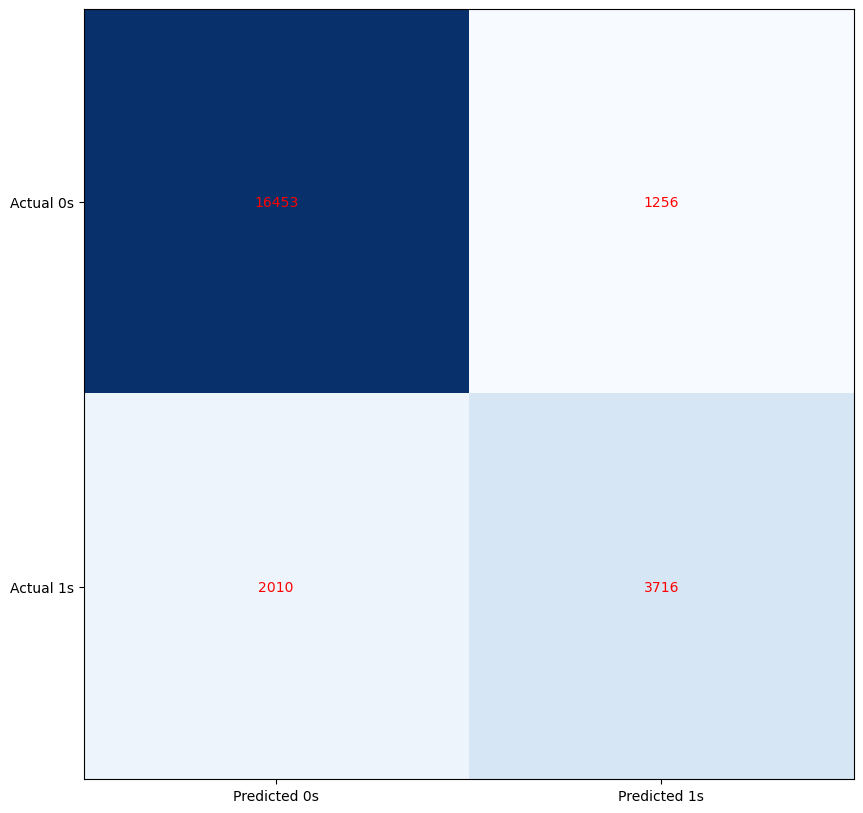

In [73]:
conf_mat = confusion_matrix(y_train_2, y_pred_mlp_2)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')
plt.show()

## Testing

We are ready to compare the winning models. We will use the test data to do this, and we will use the accuracy as the metric. We will also use the confusion matrix to see how the models perform in each class. Finally, we will decide which model is the best according to accuracy and explainability. 

We will add a last section implementing a threshold bias awareness/fairness for logistic regression.

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [75]:
# Transform the test data
X_test_2_hot = pd.get_dummies(X_test_2)

# We need to add the missing columns to the test data
missing_cols = set(X_train_2_hot.columns) - set(X_test_2_hot.columns)
for c in missing_cols:
    X_test_2_hot[c] = 0

# We need to remove the columns that are not in the training data
X_test_2_hot = X_test_2_hot[X_train_2_hot.columns]

# Scale the test data
X_test_2_scaled = scaler.transform(X_test_2_hot)


In [76]:
results_by_model = {}

# Evaluate logistic regression

y_pred_logred = logistic_model_2.predict(X_test_2_hot)

results_by_model['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test_2, y_pred_logred),
    'Precision': precision_score(y_test_2, y_pred_logred, pos_label='>50K'),
    'Recall': recall_score(y_test_2, y_pred_logred, pos_label='>50K'),
    'F1': f1_score(y_test_2, y_pred_logred, pos_label='>50K')
}

# Evaluate Naive Bayes (multinomial)

y_pred_nb = multinomial_nb_2.predict(X_test_2_hot)

results_by_model['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test_2, y_pred_nb),
    'Precision': precision_score(y_test_2, y_pred_nb, pos_label='>50K'),
    'Recall': recall_score(y_test_2, y_pred_nb, pos_label='>50K'),
    'F1': f1_score(y_test_2, y_pred_nb, pos_label='>50K')
}

# Evaluate decision tree

y_pred_tree = decision_tree_2.predict(X_test_2_hot)

results_by_model['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test_2, y_pred_tree),
    'Precision': precision_score(y_test_2, y_pred_tree, pos_label='>50K'),
    'Recall': recall_score(y_test_2, y_pred_tree, pos_label='>50K'),
    'F1': f1_score(y_test_2, y_pred_tree, pos_label='>50K')
}

# Evaluate random forest

y_pred_forest = random_forest_2.predict(X_test_2_hot)

results_by_model['Random Forest'] = {
    'Accuracy': accuracy_score(y_test_2, y_pred_forest),
    'Precision': precision_score(y_test_2, y_pred_forest, pos_label='>50K'),
    'Recall': recall_score(y_test_2, y_pred_forest, pos_label='>50K'),
    'F1': f1_score(y_test_2, y_pred_forest, pos_label='>50K')
}

# Evaluate XGBoost

y_pred_xgb = xgb_2.predict(X_test_2_hot)

results_by_model['XGBoost'] = {
    'Accuracy': accuracy_score(y_test_2, y_pred_xgb),
    'Precision': precision_score(y_test_2, y_pred_xgb, pos_label='>50K'),
    'Recall': recall_score(y_test_2, y_pred_xgb, pos_label='>50K'),
    'F1': f1_score(y_test_2, y_pred_xgb, pos_label='>50K')
}

# Evaluate MLP

y_pred_mlp = mlp_2.predict(X_test_2_scaled)

results_by_model['MLP'] = {
    'Accuracy': accuracy_score(y_test_2, y_pred_mlp),
    'Precision': precision_score(y_test_2, y_pred_mlp, pos_label='>50K'),
    'Recall': recall_score(y_test_2, y_pred_mlp, pos_label='>50K'),
    'F1': f1_score(y_test_2, y_pred_mlp, pos_label='>50K')
}

results_df = pd.DataFrame(results_by_model).T

results_df


,Accuracy,Precision,Recall,F1
Logistic Regression,0.843147,0.703316,0.581949,0.636902
Naive Bayes,0.805257,0.566304,0.752347,0.646202
Decision Tree,0.829322,0.645944,0.615162,0.630178
Random Forest,0.835125,0.679213,0.573285,0.621770
XGBoost,0.847244,0.706229,0.605776,0.652157
MLP,0.842806,0.691736,0.604332,0.645087


We can see that XGBoost is the best model in all metrics but the Recall. Since the positive class is the '>50K', we are more interested in the Precision, because we have seen how our models tend to predict '<=50K'. just because the dataset is skewed towards this class. Therefore, we choose the XGBoost model as the best one. 

Let's take a look at the confusion matrix:

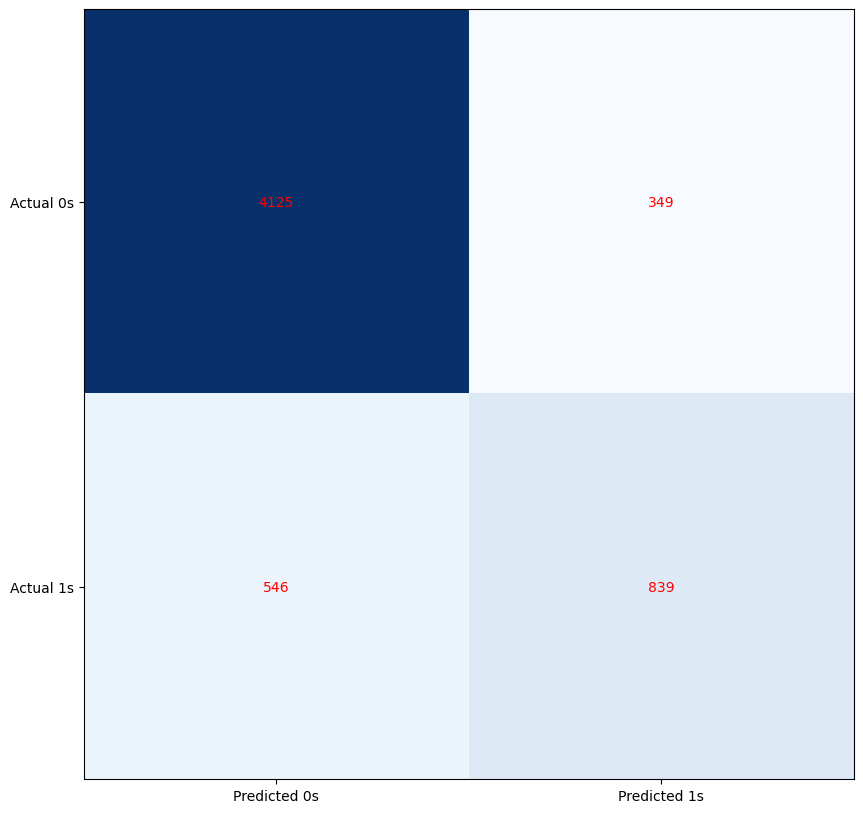

In [84]:
conf_mat = confusion_matrix(y_test_2, y_pred_xgb)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')

plt.show()

## Threshold bias awareness/fairness

Following the research presented in [this showcase](http://research.google.com/bigpicture/attacking-discrimination-in-ml/) from a Google paper, we will try to implement a threshold bias awareness/fairness for logistic regression.

The basic idea is that a model can be biased towards a certain class, and this can be a problem if the model is used to make decisions that affect people. For example, if we use a model to decide if a person should be granted a loan, and the model is biased towards a certain class, then we are discriminating against that class.

Therefore, a possible solution is to have a different threshold for each class, so that we aim at equalizing some metric between the two classes. We will follow the approach **Equal opportunity** from the paper, which aims at equalizing the true positive rate between the two classes. We will follow a naïve approach to this, consisting on searching among a range of thresholds for a pair of thresholds that brings the true positive rate of both classes closer.

First, let's assess if the model behaves differently for men and women:

In [77]:
X_M = X_test_2[X_test_2['sex'] == 'Male']
X_W = X_test_2[X_test_2['sex'] == 'Female']

Y_M = y_test_2[X_test_2['sex'] == 'Male']
Y_W = y_test_2[X_test_2['sex'] == 'Female']

X_M_hot = pd.get_dummies(X_M)
X_W_hot = pd.get_dummies(X_W)

# We need to add the missing columns to the test data
missing_cols = set(X_train_2_hot.columns) - set(X_M_hot.columns)
for c in missing_cols:
    X_M_hot[c] = 0

# We need to remove the columns that are not in the training data
X_M_hot = X_M_hot[X_train_2_hot.columns]

# We need to add the missing columns to the test data
missing_cols = set(X_train_2_hot.columns) - set(X_W_hot.columns)
for c in missing_cols:
    X_W_hot[c] = 0

# We need to remove the columns that are not in the training data
X_W_hot = X_W_hot[X_train_2_hot.columns]

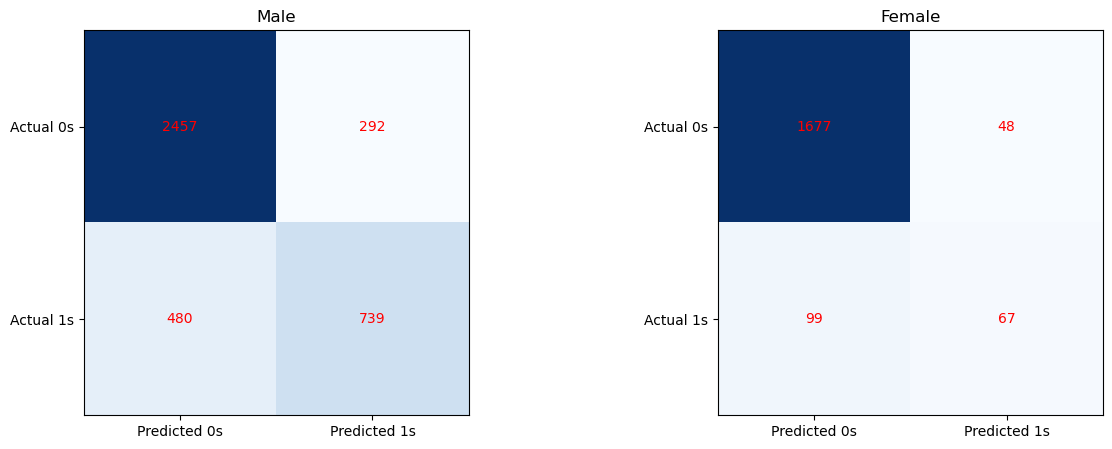

In [78]:
# Now, we predict for each class with the logistic regression model
# By default, the threshold is 0.5

y_pred_logred_M = logistic_model_2.predict(X_M_hot)
y_pred_logred_W = logistic_model_2.predict(X_W_hot)

# And we show both confusion matrices
conf_M = confusion_matrix(Y_M, y_pred_logred_M)
conf_W = confusion_matrix(Y_W, y_pred_logred_W)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(conf_M, cmap='Blues')
ax2.imshow(conf_W, cmap='Blues')
ax1.grid(False)
ax2.grid(False)
ax1.set_title('Male')
ax2.set_title('Female')
ax1.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax1.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax2.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax2.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax1.set_ylim(1.5, -0.5)
ax2.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax1.text(j, i, conf_M[i, j], ha='center', va='center', color='red')
        ax2.text(j, i, conf_W[i, j], ha='center', va='center', color='red')

plt.show()



As we can see, for women, the model has greater accuracy, but only because the percentage of women earning >50 is smaller, and the model in general is more inclined to predict <=50.

Let's see both positive rates:

In [79]:
sensitivity_M = conf_M[1, 1] / (conf_M[1, 1] + conf_M[1, 0])
sensitivity_W = conf_W[1, 1] / (conf_W[1, 1] + conf_W[1, 0])

print(f'The sensitivities (true positive rates) are: M: {sensitivity_M:.2f}, W: {sensitivity_W:.2f}')

The sensitivities (true positive rates) are: M: 0.61, W: 0.40


So there is home for improvement. Let's see if we can improve the model by using different thresholds for each class. For this, we are going to use the training data, and we will use the same threshold for the test data, to see if the model is more balanced.

In [80]:
X_train_M = X_train_2[X_train_2['sex']=='Male']
X_train_W = X_train_2[X_train_2['sex']=='Female']
y_train_M = y_train_2[X_train_2['sex']=='Male']
y_train_W =y_train_2[X_train_2['sex']=='Female']

X_train_M_hot = pd.get_dummies(X_train_M)
X_train_W_hot = pd.get_dummies(X_train_W)

# We need to add the missing columns to each segment data (it could happen that some values are not present in a segment)
missing_cols = set(X_train_2_hot.columns) - set(X_train_M_hot.columns)
for c in missing_cols:
    X_train_M_hot[c] = 0

# We need to remove the columns that are not in the training data
X_train_M_hot = X_train_M_hot[X_train_2_hot.columns]

# We need to add the missing columns to each segment data (it could happen that some values are not present in a segment)
missing_cols = set(X_train_2_hot.columns) - set(X_train_W_hot.columns)
for c in missing_cols:
    X_train_W_hot[c] = 0

# We need to remove the columns that are not in the training data
X_train_W_hot = X_train_W_hot[X_train_2_hot.columns]

# We will try to optimize the threshold for the logistic regression model

# 1. We predict the probabilities for the training data

y_pred_prob_M = logistic_model_2.predict_proba(X_train_M_hot)
y_pred_prob_W = logistic_model_2.predict_proba(X_train_W_hot)

# 2. We create a list of thresholds and iterate over them to get the best one according to most similar sensitivities
best_diff = float('inf')
best_thresholds = (0.5, 0.5)

for threshold_M in np.arange(0.3,0.71,0.01):
    for threshold_W in np.arange(0.3,0.71,0.01):
        y_pred_M = ["<=50K" if x < threshold_M else ">50K" for x in y_pred_prob_M[:,1]]
        y_pred_W = ["<=50K" if x < threshold_W else ">50K" for x in y_pred_prob_W[:,1]]

        conf_M = confusion_matrix(y_train_M, y_pred_M)
        conf_W = confusion_matrix(y_train_W, y_pred_W)


        sensitivity_M = conf_M[1, 1] / (conf_M[1, 1] + conf_M[1, 0])
        sensitivity_W = conf_W[1, 1] / (conf_W[1, 1] + conf_W[1, 0])

        if sensitivity_M*sensitivity_W < 0.01:
            continue

        diff = abs(sensitivity_M - sensitivity_W)

        if diff < best_diff:
            best_diff = diff
            best_thresholds = (threshold_M, threshold_W)
            print(f'New best thresholds: M: {threshold_M:.2f}, W: {threshold_W:.2f}, Diff: {diff:.8f}')

New best thresholds: M: 0.30, W: 0.30, Diff: 0.16527281


New best thresholds: M: 0.31, W: 0.30, Diff: 0.15842065
New best thresholds: M: 0.32, W: 0.30, Diff: 0.14783095
New best thresholds: M: 0.33, W: 0.30, Diff: 0.13807181
New best thresholds: M: 0.34, W: 0.30, Diff: 0.12768975
New best thresholds: M: 0.35, W: 0.30, Diff: 0.11585420
New best thresholds: M: 0.36, W: 0.30, Diff: 0.10526450
New best thresholds: M: 0.37, W: 0.30, Diff: 0.09488244
New best thresholds: M: 0.38, W: 0.30, Diff: 0.08366982
New best thresholds: M: 0.39, W: 0.30, Diff: 0.07370304
New best thresholds: M: 0.40, W: 0.30, Diff: 0.06228278
New best thresholds: M: 0.41, W: 0.30, Diff: 0.05314656
New best thresholds: M: 0.42, W: 0.30, Diff: 0.04193394
New best thresholds: M: 0.43, W: 0.30, Diff: 0.03383593
New best thresholds: M: 0.44, W: 0.30, Diff: 0.02386915
New best thresholds: M: 0.45, W: 0.30, Diff: 0.01141068
New best thresholds: M: 0.46, W: 0.30, Diff: 0.00144390
New best thresholds: M: 0.51, W: 0.34, Diff: 0.00016931
New best thresholds: M: 0.53, W: 0.37, Diff: 0.0

In [81]:
print(f'The best thresholds are: M: {best_thresholds[0]:.2f}, W: {best_thresholds[1]:.2f} with a difference of {best_diff:.8f}')

The best thresholds are: M: 0.53, W: 0.37 with a difference of 0.00007667


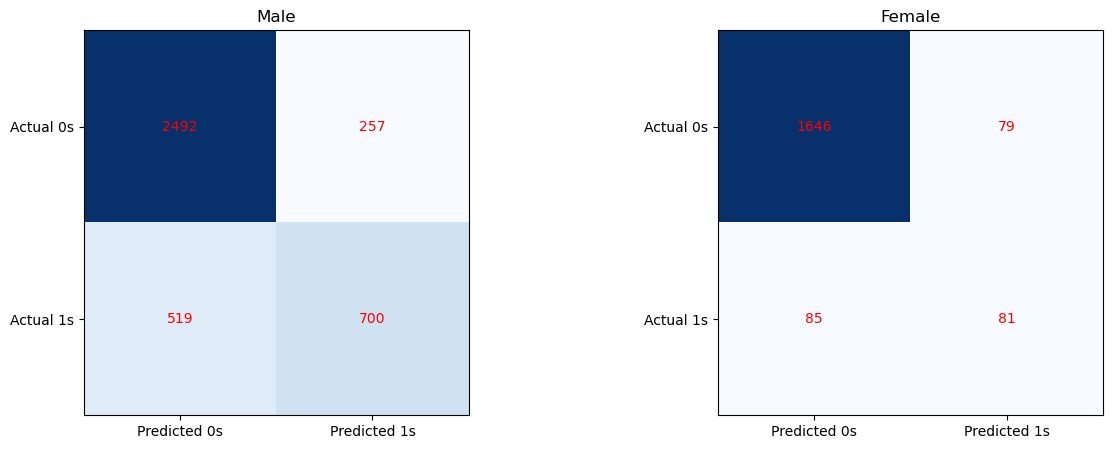

In [82]:
# 3. We predict the probabilities for the test data

y_pred_prob_M = logistic_model_2.predict_proba(X_M_hot)
y_pred_prob_W = logistic_model_2.predict_proba(X_W_hot)

# 4. We predict the classes for the test data

y_pred_M = ["<=50K" if x < best_thresholds[0] else ">50K" for x in y_pred_prob_M[:,1]]
y_pred_W = ["<=50K" if x < best_thresholds[1] else ">50K" for x in y_pred_prob_W[:,1]]

# 5. We compute the confusion matrix for the test data
conf_M = confusion_matrix(Y_M, y_pred_M)
conf_W = confusion_matrix(Y_W, y_pred_W)

# 6. We plot the confusion matrix for the test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(conf_M, cmap='Blues')
ax2.imshow(conf_W, cmap='Blues')
ax1.grid(False)
ax2.grid(False)
ax1.set_title('Male')
ax2.set_title('Female')
ax1.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax1.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax2.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax2.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax1.set_ylim(1.5, -0.5)
ax2.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax1.text(j, i, conf_M[i, j], ha='center', va='center', color='red')
        ax2.text(j, i, conf_W[i, j], ha='center', va='center', color='red')

plt.show()

In [85]:
sensitivity_M = conf_M[1, 1] / (conf_M[1, 1] + conf_M[1, 0])
sensitivity_W = conf_W[1, 1] / (conf_W[1, 1] + conf_W[1, 0])

print(f'The sensitivities (true positive rates) are: M: {sensitivity_M:.2f}, W: {sensitivity_W:.2f}')

print(f'The accuracy for the model is: {(conf_M[0,0]+conf_M[1,1])/(conf_M[0,0]+conf_M[1,1]+conf_M[0,1]+conf_M[1,0]):.2f}')
print(f'The f1-score for the model is: {(2*conf_M[1,1])/(2*conf_M[1,1]+conf_M[0,1]+conf_M[1,0]):.2f}')

The sensitivities (true positive rates) are: M: 0.57, W: 0.49
The accuracy for the model is: 0.80
The f1-score for the model is: 0.64


We observe that the model is now more balanced, and the true positive rate is more similar for both classes. However, it decreased the true positive rate for the male class, so this is really a decision that has to be made, depending on the use case. Specially, we should focus on the 'Equal opportunity' metric in scenarios in which performing a biased decision towards a certain class is not acceptable. If this is not the case, then we should focus on the accuracy or the f1 score, as we have done so far. We observe how the accuracy and f1-score have decreased slightly, so this trade-off needs to be taken into account.

## Conclusions

We have study this salaries' dataset in depth, obtaining the following insights:

- There are many segments in which we can divide the individuals of the dataset, with some of them being clearly underrepresented. This is something important that should be taken into account, specially when using the model to make decisions that affect people. In fact, we have seen how the model could be adapted to be more fair towards certain classes, by using different thresholds for each class, with the example made for the sex attribute.

- We have seen how the dataset is skewed towards the '<=50K' class, and how this affects the models, which tend to predict this class more often. This is something that should be taken into account when training the models, and we have seen how we can use different metrics to assess the performance of the models, depending on the use case. We decided to use the f1-score, which puts the focus on the positive class, and therefore, it is more useful in this case.

- We have seen how the models perform better when using the second dataset, which has the education attribute encoded as numbers, instead of one-hot encoding. This is because the models have less variables to work with, and therefore it is less prone to overfitting. The gain is very slight, but it is something.

- We also saw how the preprocessing that we did was useful, since the models performed better when using the preprocessed data. 

- We understood how some variables are more relevant than others when predicting the salary, and did some feature selection and engineering to improve the models. For instance, we removed the 'fnlwgt' attribute, which was not useful at all, and we created a new attribute 'capital-diff', which incorporated the information from the 'capital-gain' and 'capital-loss' attributes.

- Finally, our study showed that the best model is the XGBoost model, which is the one that has the best accuracy and f1-score. We also saw how the logistic regression model (and any model that can output probabilities) can be adapted to be more fair towards certain classes, by using different thresholds for each class.

## Future work

- We could try to improve the models by doing more feature engineering, for instance, we could try to further divide the 'capital-diff' attribute into more categories, or we could try to create new attributes from the 'occupation' attribute, which is very important when predicting the salary. We could also try to cluster the individuals into different groups, and use this information to create new attributes.

- We could try to improve the models by using different hyperparameters, or by using different models. For instance, we could try to use a different kind of neural network, or we could try to use a different boosting algorithm, such as LightGBM.

- We could try to cross the information from this dataset with other datasets, to see if we can improve the models. For instance, we could try to cross the information with the census dataset, to see if we can get more information about the individuals. Specially, we could try to incorporate more information about the underrepresented classes, to see if we can improve the models.

- Finally, the bias awareness/fairness that we implemented is very naïve, and we could try to implement a more sophisticated approach. We could also try to implement a different approach, such as the 'Equalized odds' approach, which aims at equalizing the false positive rate between the two classes. But for the purpose of this project, we think that the naïve approach is enough to show the idea and the trade-offs that we have to make when using a model to make decisions that affect people.

## References

- Our bias awareness/fairness approach is based in this [Google paper](http://research.google.com/bigpicture/attacking-discrimination-in-ml/)
- One can read more about [Fairness in Machine Learning by Google](https://developers.google.com/machine-learning/fairness-overview/)
- We have used the [scikit-learn](https://scikit-learn.org/stable/) library for the machine learning models exhaustively
- The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/adult)